# Comparing Orbital Distributions


In [1]:
using CairoMakie
using Arya
using LilGuys
using CSV, DataFrames


In [2]:
using PyFITS

In [3]:
using HDF5

In [4]:
FIGDIR = "./figures"

"./figures"

In [19]:
CairoMakie.activate!(type=:png)

In [5]:
function read_traj(name)
    local positions, velocities, times
    
    h5open("$name/trajectory.hdf5", "r") do f
        positions = f["positions"][:, :, :]
        velocities = f["velocities"][:, :, :]
        times = -f["times"][:]
    end

    return positions, velocities, times
end

read_traj (generic function with 1 method)

In [6]:
function read_lmc_traj(name)
    
    # loads in trajectory of lmc in Vasiliev 2021
    lmc_file = "$name/lmc_traj.csv"
    lmc_traj = CSV.read(lmc_file, DataFrame)
    
    pos = reshape([lmc_traj.x lmc_traj.y lmc_traj.z]', (3, 1, :))
    vel = reshape([lmc_traj.v_x lmc_traj.v_y lmc_traj.v_z]', (3, 1, :))

    return pos, vel, -(lmc_traj.time)
end

read_lmc_traj (generic function with 1 method)

In [7]:
function subtract_traj(traja, trajb)
    if !isapprox(traja[3], trajb[3], atol=1e-3)
        println(extrema(traja[3]), " ", diff(traja[3])[1])
        println(extrema(trajb[3]), " ", diff(trajb[3])[1])
        error("trajectories do not match")
    end

    return traja[1] .- trajb[1], traja[2] .- trajb[2], traja[3]
end

subtract_traj (generic function with 1 method)

In [8]:
plot_labels = Dict(
    "pericentre" => "pericentre / kpc",
    "peri_lmc" => "perilmc / kpc",
    "apocentre" => "apocentre / kpc",
    )

Dict{String, String} with 3 entries:
  "peri_lmc"   => "perilmc / kpc"
  "apocentre"  => "apocentre / kpc"
  "pericentre" => "pericentre / kpc"

# Compare trajectories

In [21]:
function plot_r_t_traj!(traj; alpha=0.01, thin=1, color=:black, t_min=-5/T2GYR, kwargs...)
    positions, velocities, times = traj
    for i in 1:thin:size(positions, 2)
        x = times * T2GYR
        y = radii(positions[:, i, :])

        filt = times .> t_min
        lines!(x[filt], y[filt]; rasterize=true, alpha=alpha, color=color, kwargs...)
    
    end
end

plot_r_t_traj! (generic function with 1 method)

In [20]:
function plot_x_y_traj!(traj; thin=1, x_direction=2, y_direction=3, alpha=0.01, t_min=-5/T2GYR, color=:black, kwargs...)
    positions, velocities, times = traj
    for i in 1:thin:size(positions, 2)
        filt = times .> t_min

        x = positions[x_direction, i, filt]
        y = positions[y_direction, i, filt]


        lines!(x, y; rasterize=true, alpha=alpha, color=color, kwargs...)
    
    end
end

plot_x_y_traj! (generic function with 1 method)

In [13]:
function compare_x_y_traj(trajectories; kwargs...)
    fig = Figure()
    ax = Axis(fig[1, 1], xlabel="y / kpc", ylabel="z / kpc",
        xgridvisible=false, ygridvisible=false, 
        aspect=DataAspect(),
    )
    
    for (i, (label, traj)) in enumerate(trajectories)
        plot_x_y_traj!(traj, label=label, color=COLORS[i]; kwargs...)
    end
        
    fig, ax
end

compare_x_y_traj (generic function with 1 method)

In [14]:
function compare_r_t_traj(trajectories; kwargs...)
    fig = Figure()
    ax = Axis(fig[1, 1], xlabel="time / Gyr", ylabel = "Scl galactocentric distance / kpc",
        xgridvisible=false, ygridvisible=false
    )

    for (i, (label, traj)) in enumerate(trajectories)
        plot_r_t_traj!(traj, label=label, color=COLORS[i]; kwargs...)
    end
    
    fig, ax
end

compare_r_t_traj (generic function with 1 method)

In [30]:
traj_fiducial = [
    "fiducial" => read_traj("EP2020"),
    "4xdist" => read_traj("EP2020_distance_err"),
    ]

2-element Vector{Pair{String, Tuple{Array{Float64, 3}, Array{Float64, 3}, Vector{Float64}}}}:
 "fiducial" => ([1.5408939123153687 1.6922519207000732 … 1.5496355295181274 1.685158610343933; 6.786767959594727 6.893074989318848 … 6.79290771484375 6.888092994689941; 44.81951141357422 45.52123260498047 … 44.86003875732422 45.488346099853516;;; 1.6088612079620361 1.7431479692459106 … 1.598604440689087 1.7015767097473145; 6.907540321350098 6.990196228027344 … 6.910849571228027 7.073915004730225; 43.56515884399414 44.215232849121094 … 43.56657028198242 44.1823616027832;;; 1.6759130954742432 1.7930833101272583 … 1.6466639041900635 1.717056155204773; 7.024383544921875 7.083465576171875 … 7.02485990524292 7.255834102630615; 42.285728454589844 42.88458251953125 … 42.24802017211914 42.851722717285156;;; … ;;; -14.223767280578613 21.86033821105957 … 23.140405654907227 14.42682933807373; -42.62849044799805 71.7401351928711 … 83.16973876953125 78.34359741210938; 17.559322357177734 63.00626754760742 … 

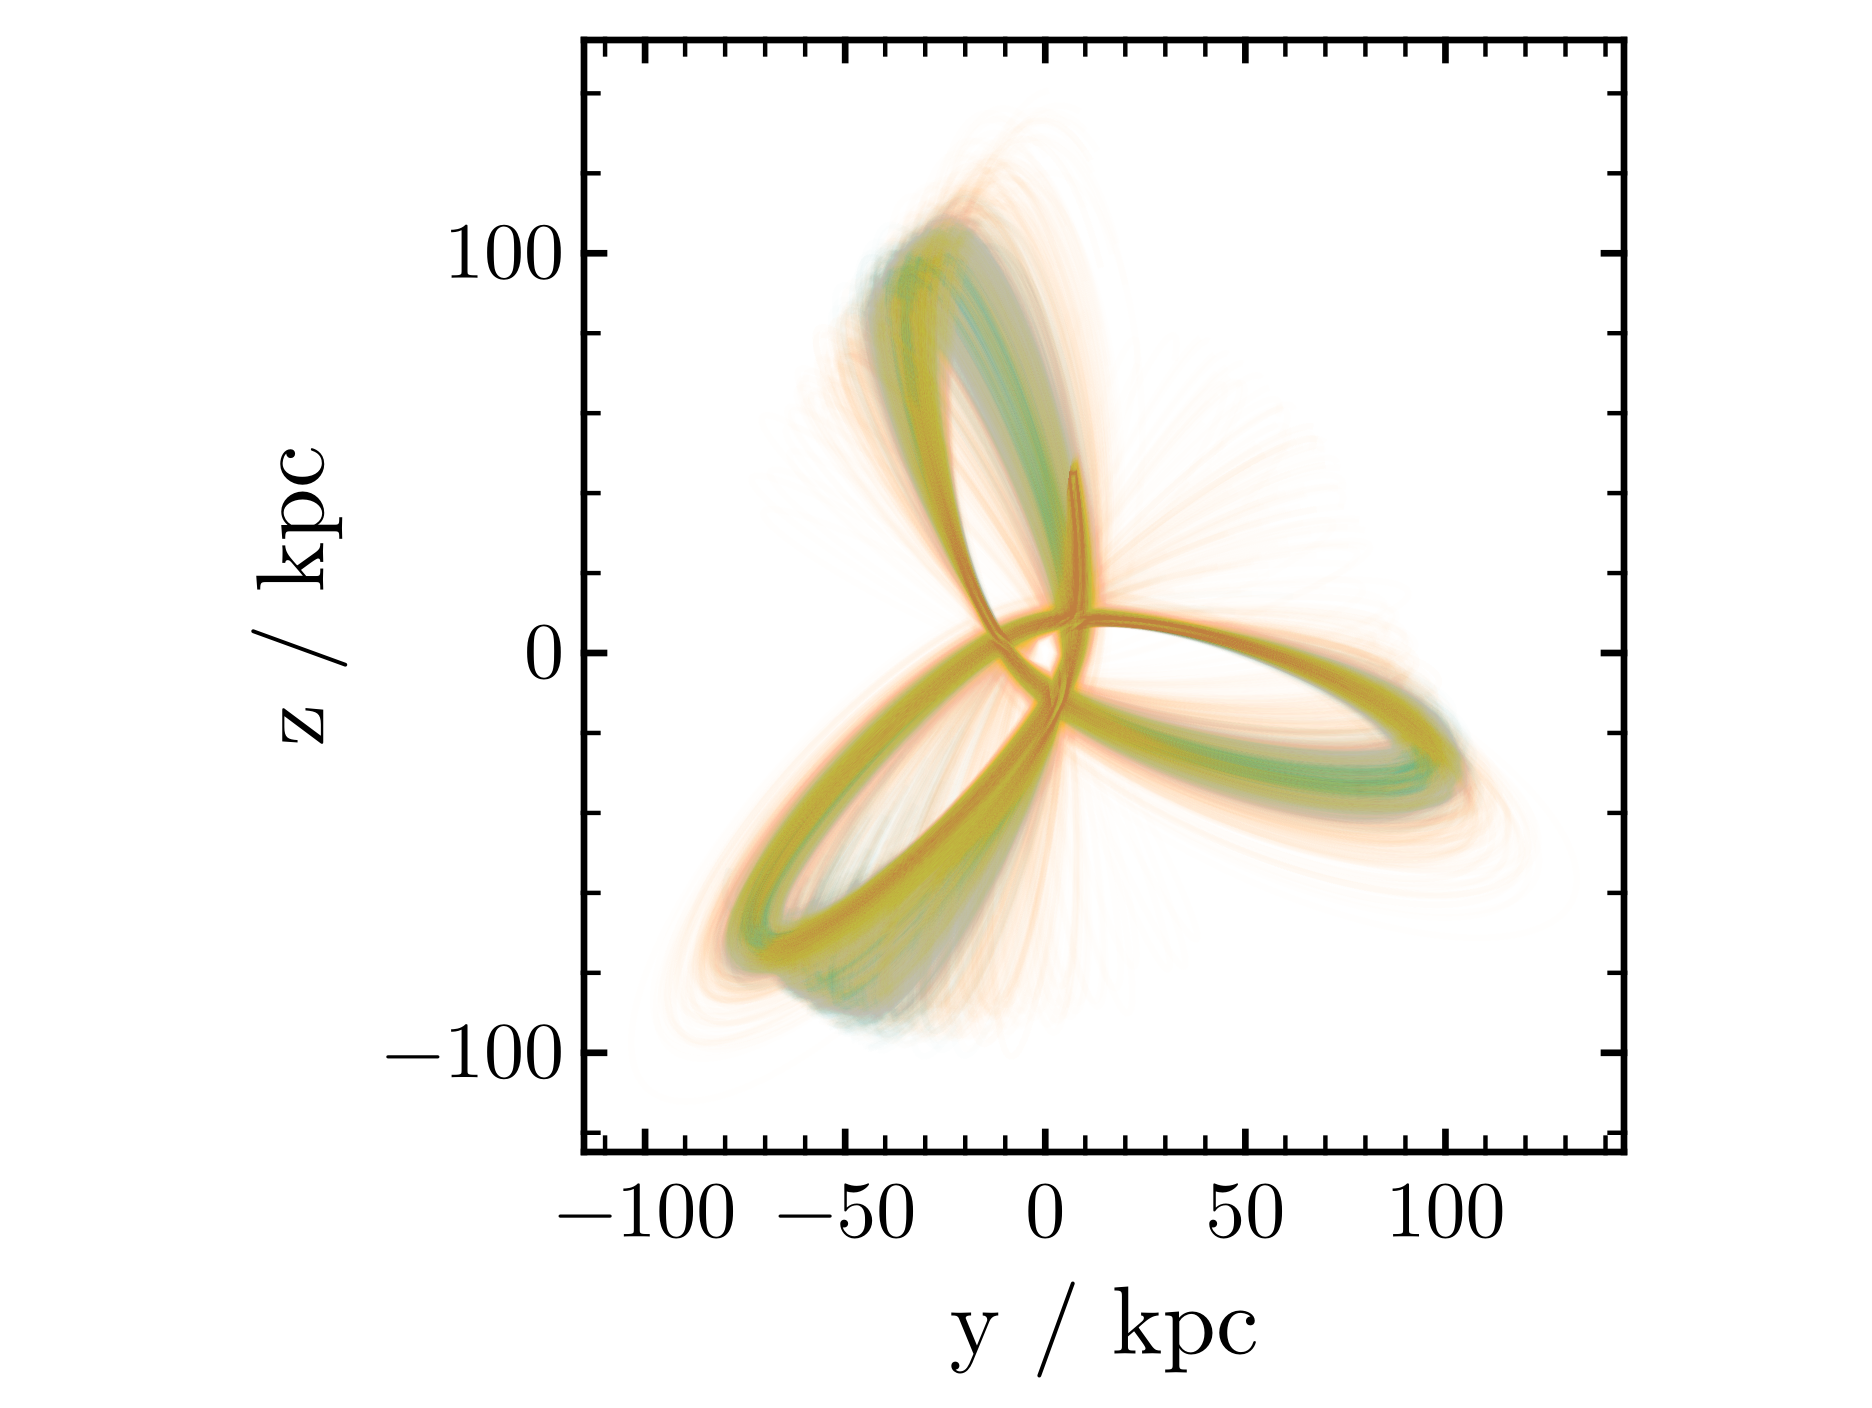

In [32]:
compare_x_y_traj(traj_fiducial)[1]

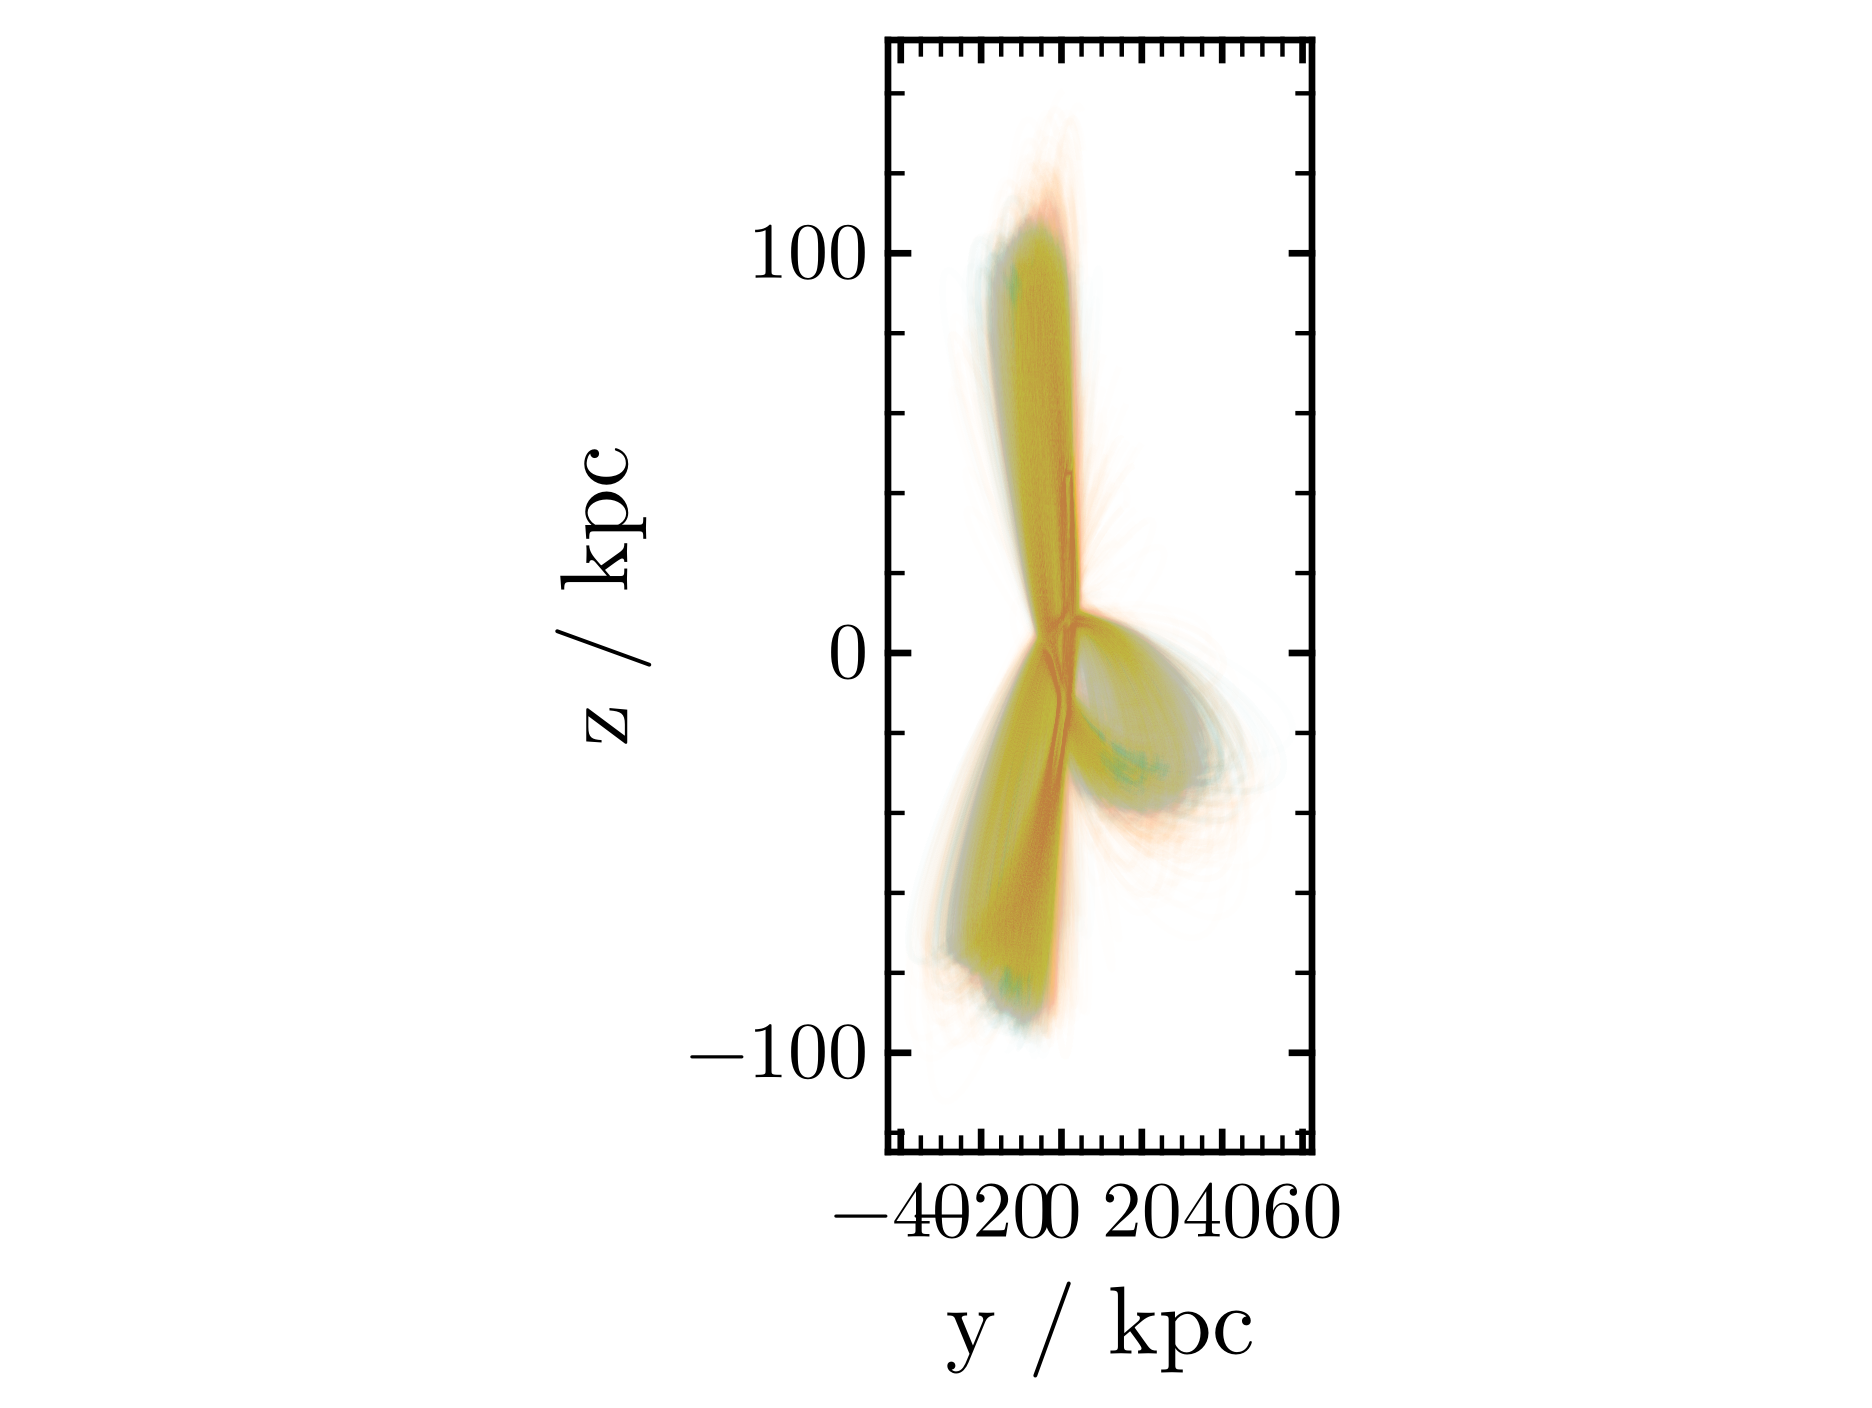

In [56]:
compare_x_y_traj(traj_fiducial, x_direction=1)[1]

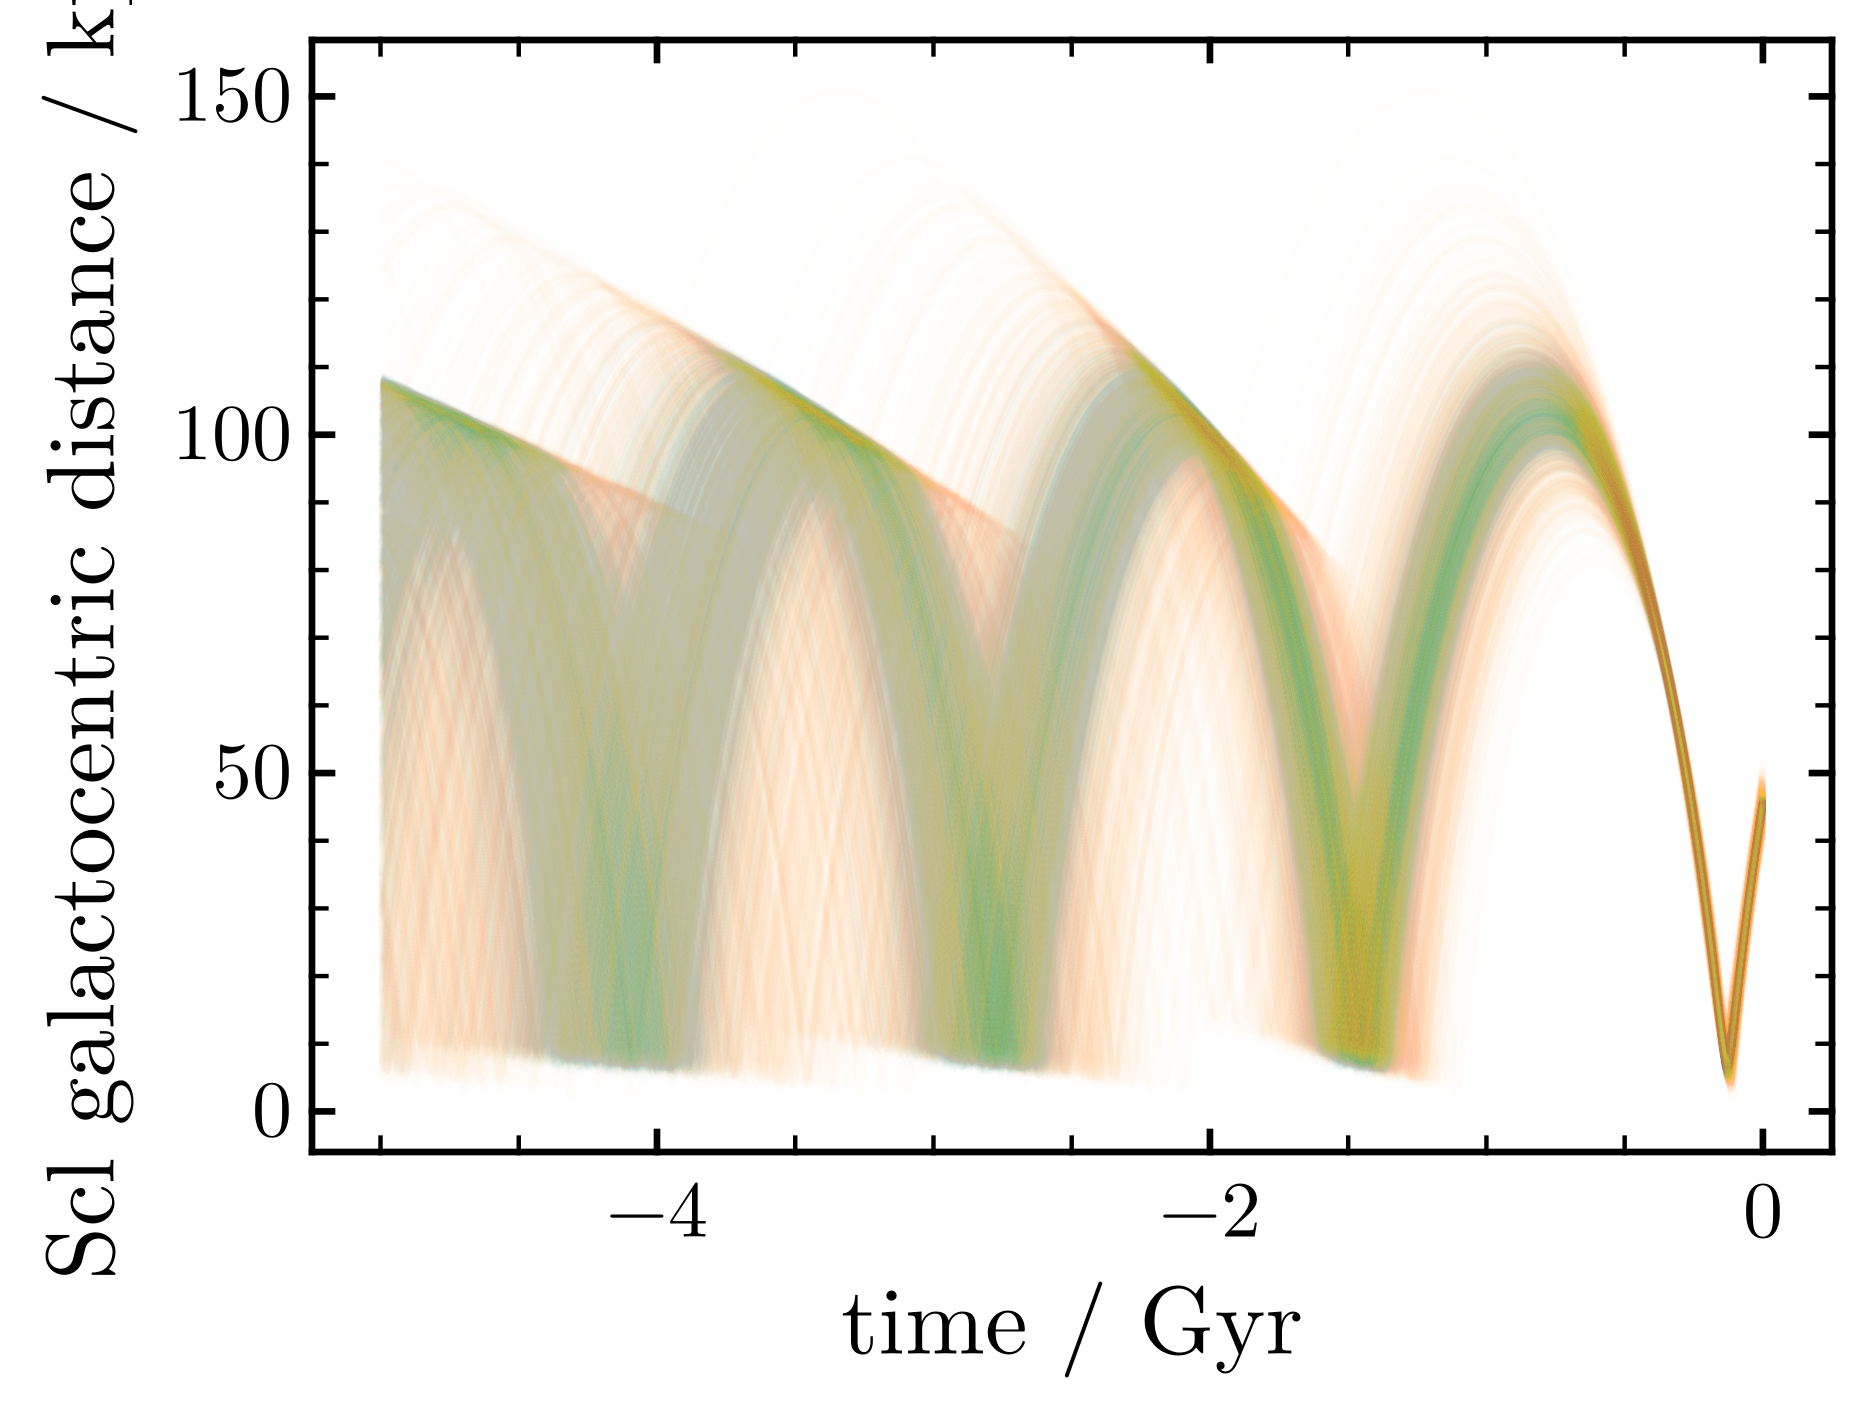

In [31]:
compare_r_t_traj(traj_fiducial)[1]

In [81]:
traj_hunter = [
    "axi" => read_traj("hunter+2024_axi"),
    "bar+spiral" => read_traj("hunter+2024_rotspiral"),
    "bar+spiral+dist" => read_traj("hunter+2024_rotspiral_distance_err"),
        ];

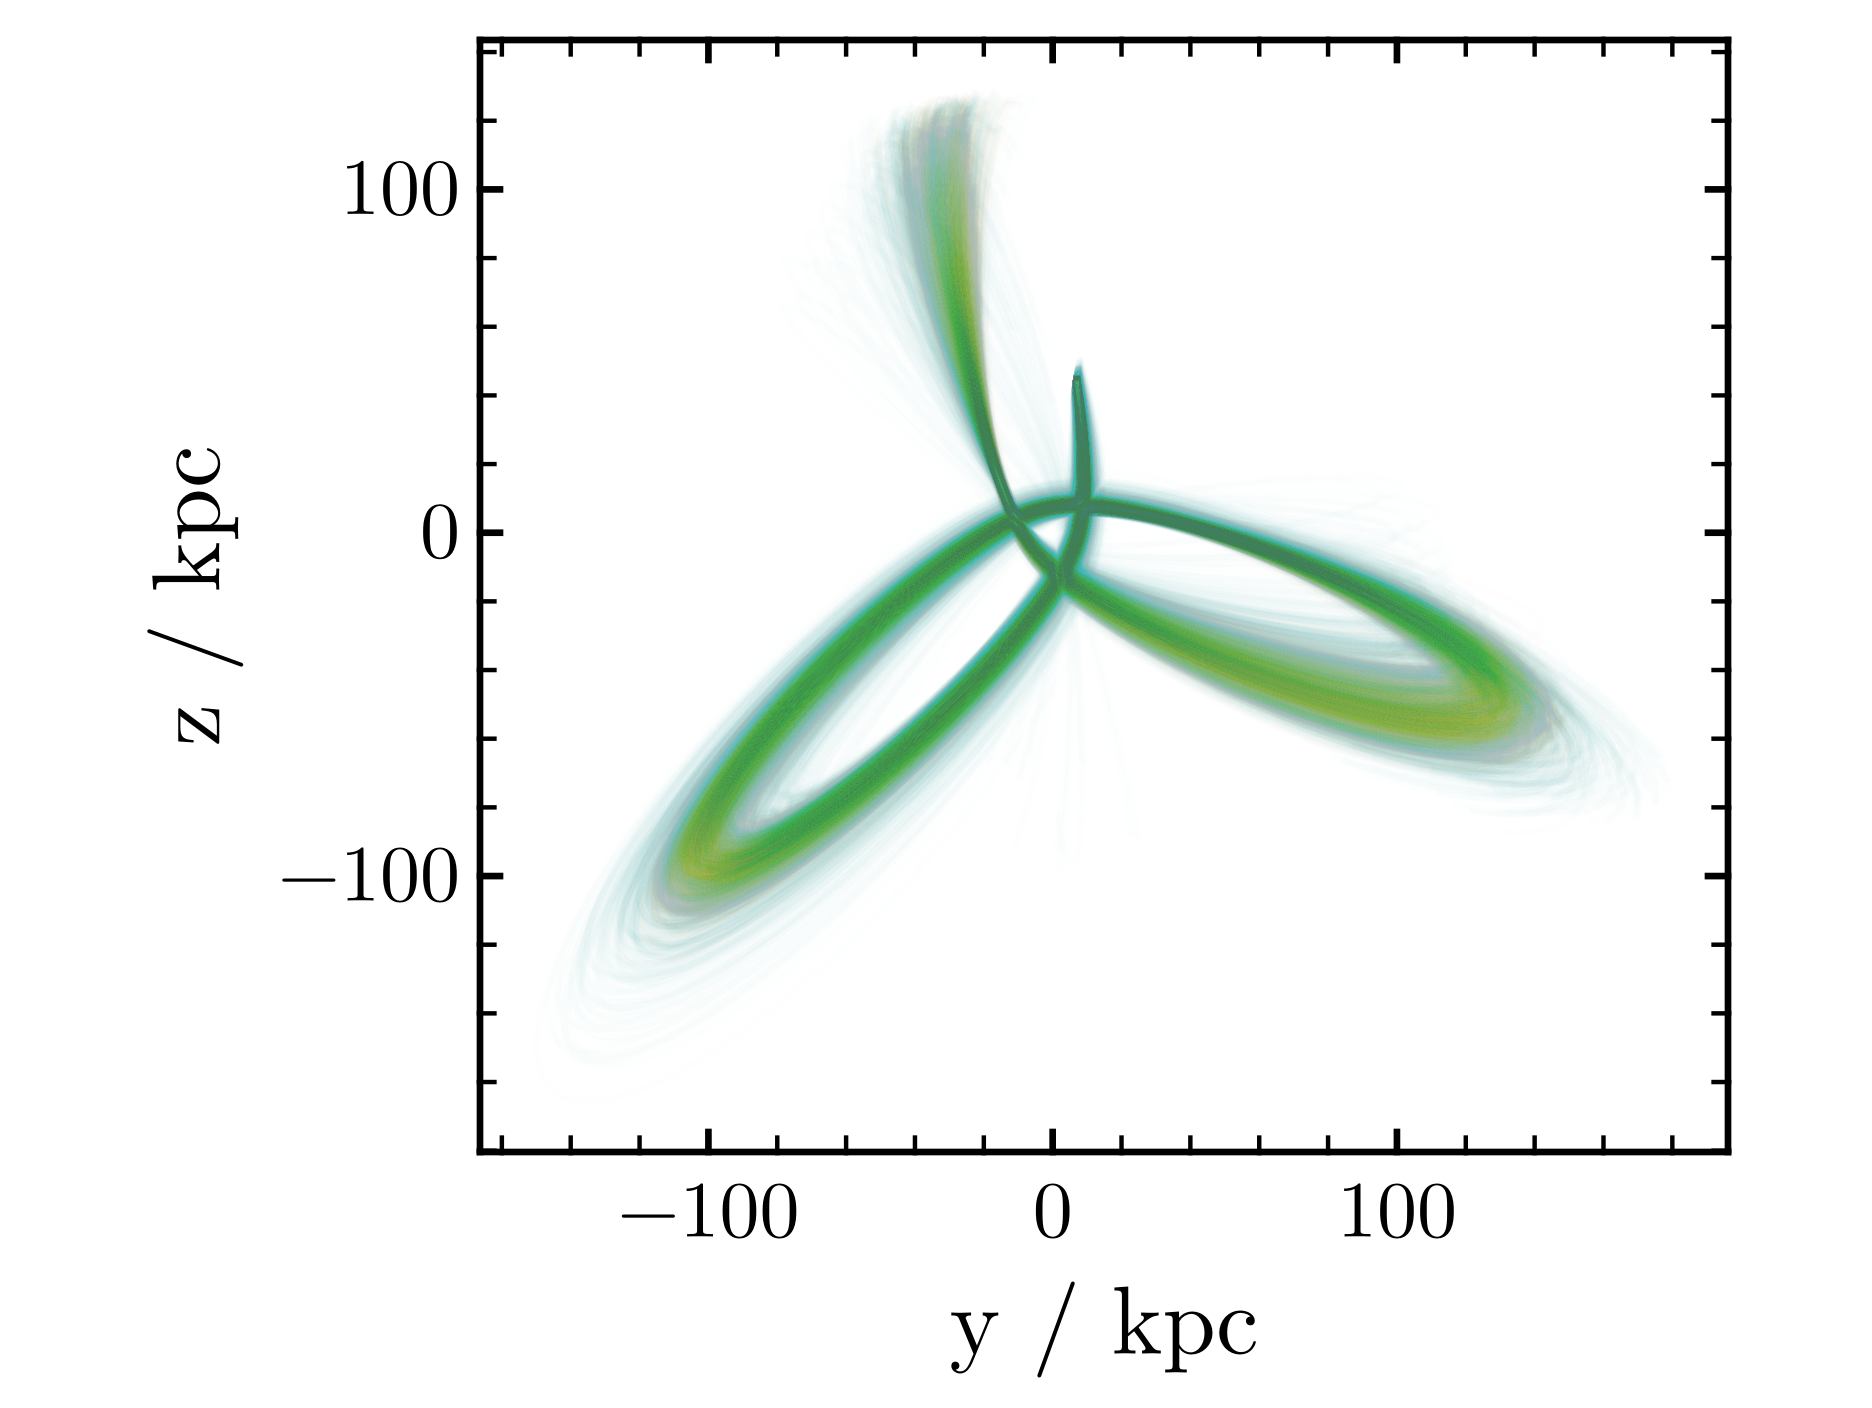

In [82]:
compare_x_y_traj(traj_hunter)[1]

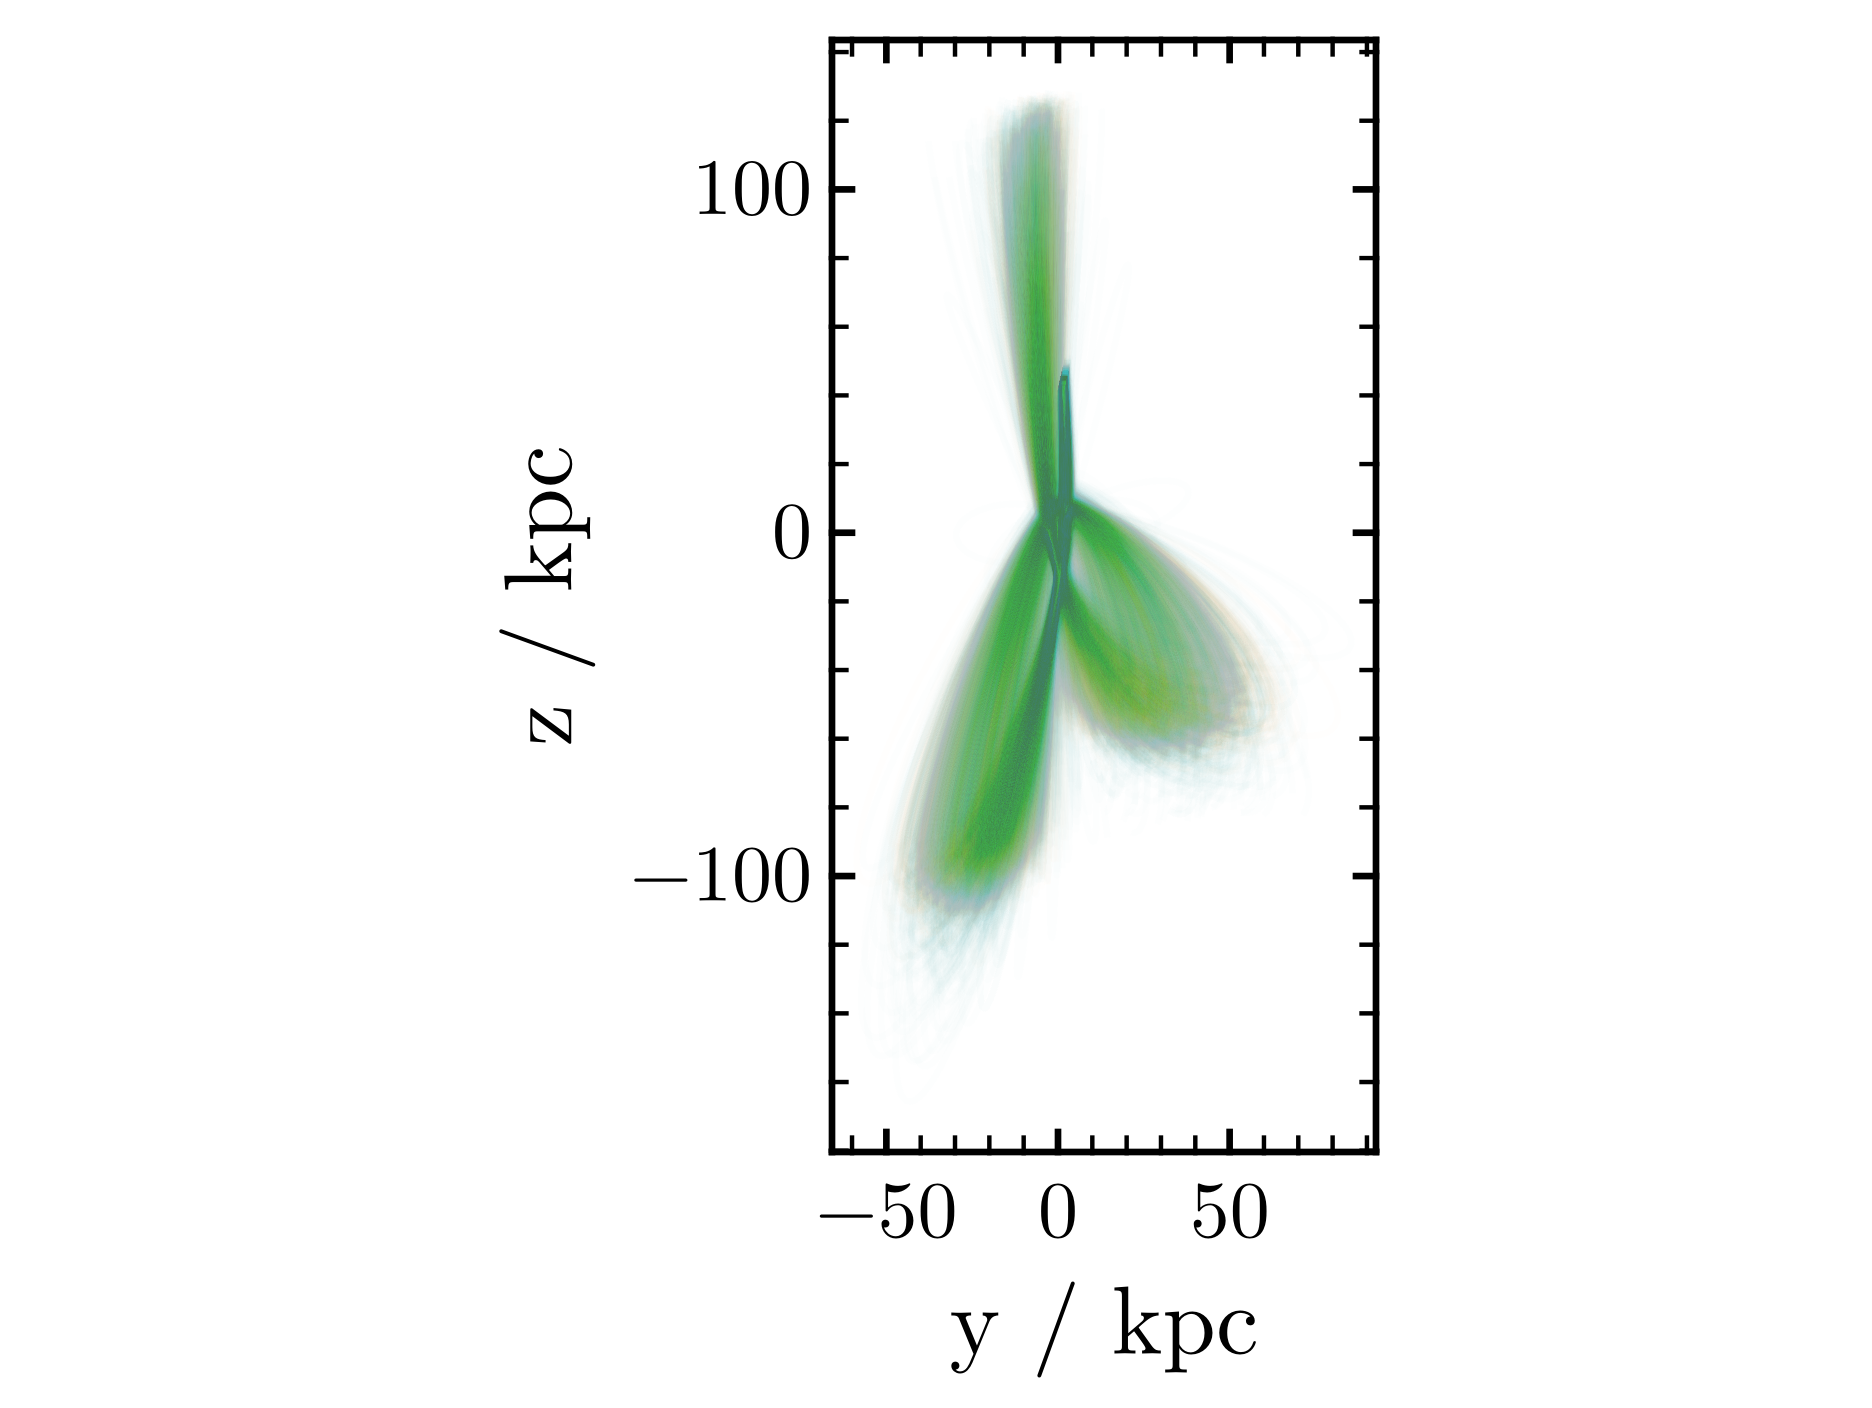

In [83]:
compare_x_y_traj(traj_hunter, x_direction=1)[1]

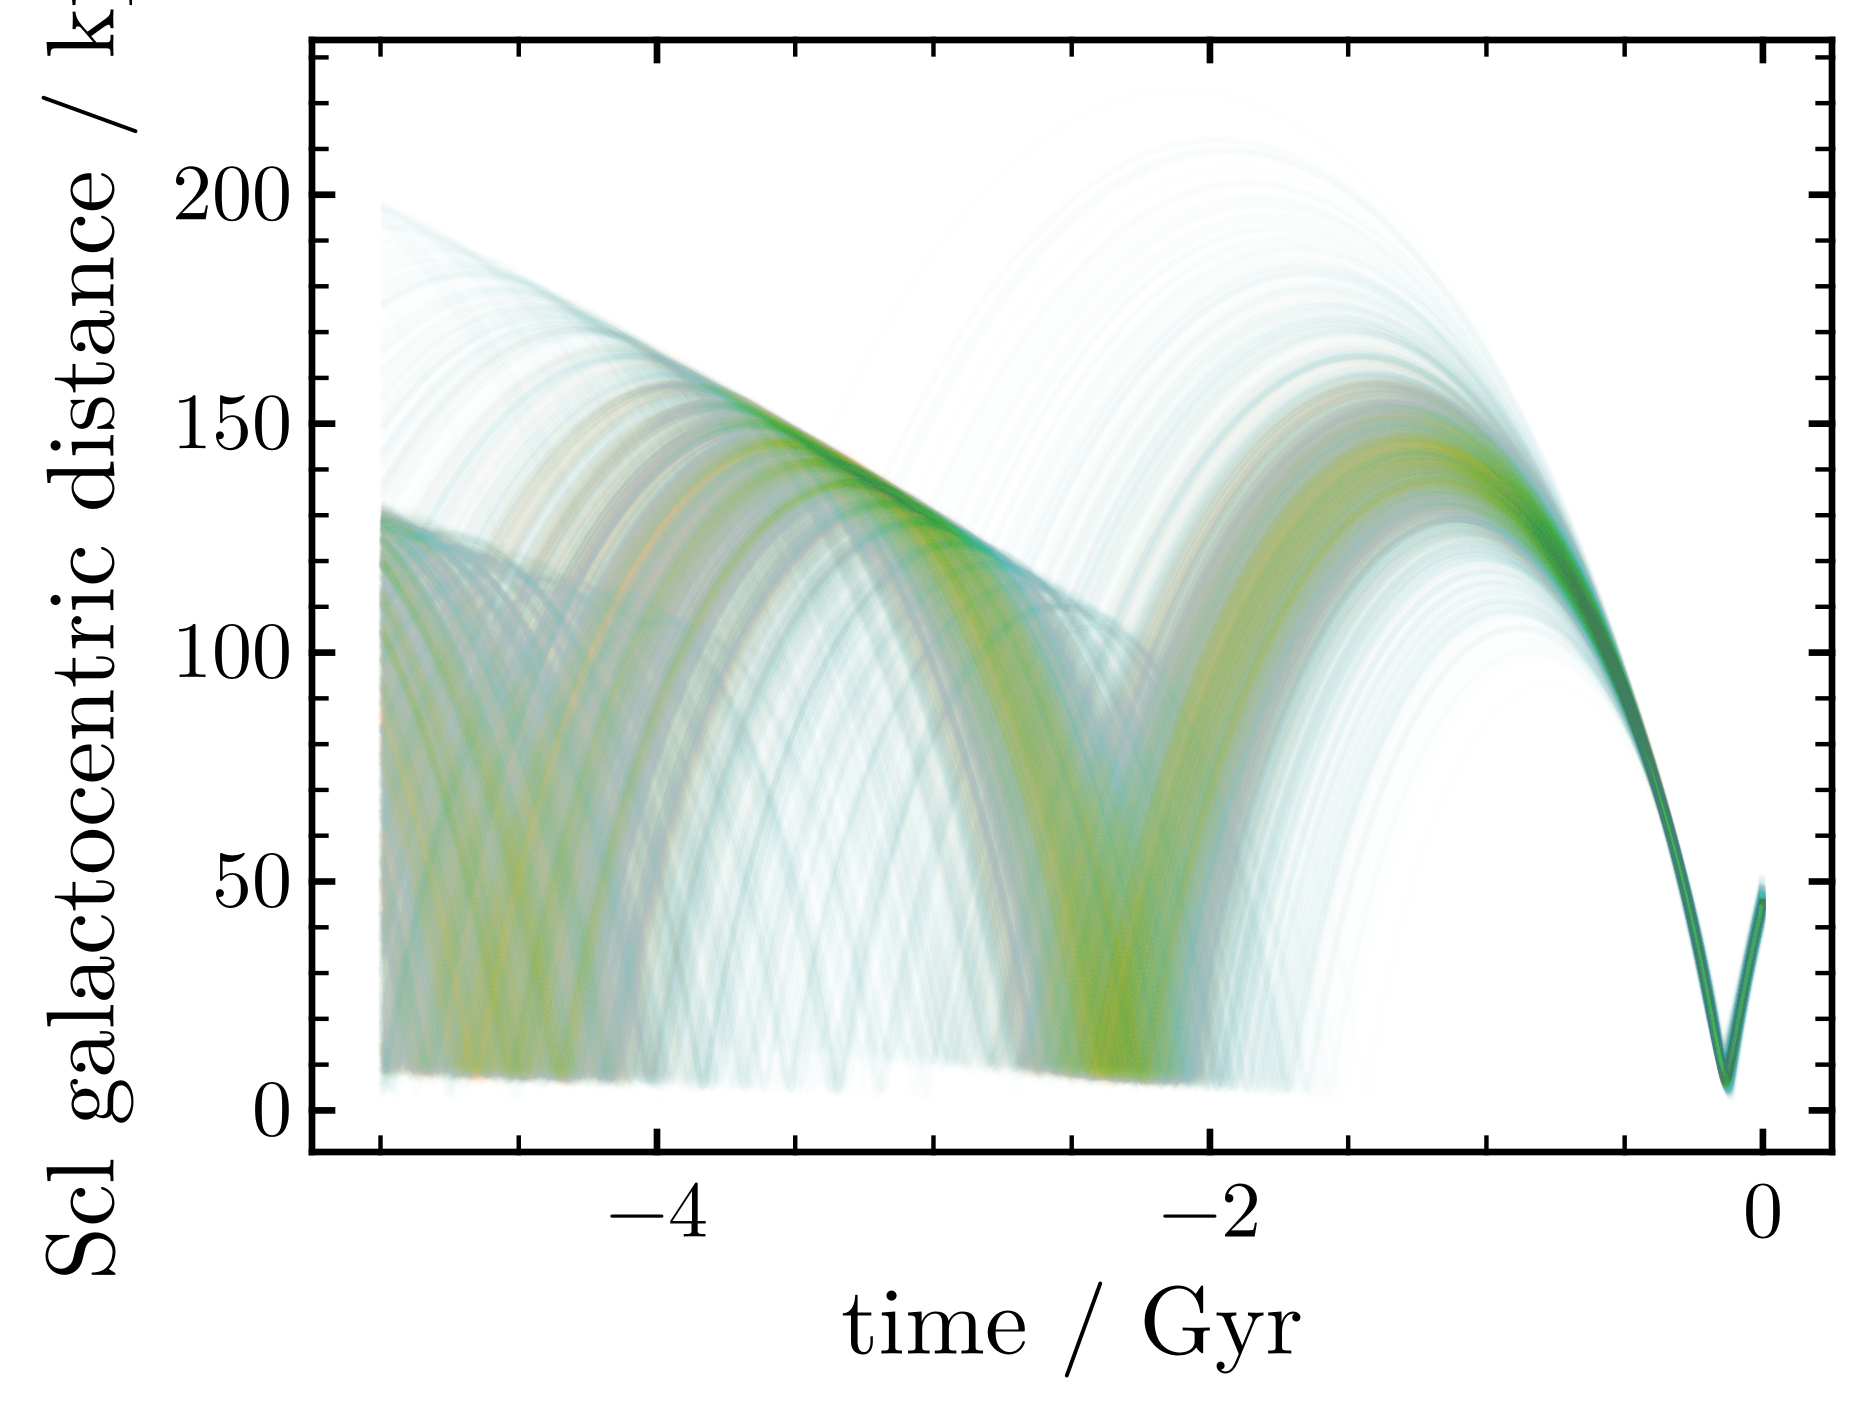

In [84]:
compare_r_t_traj(traj_hunter)[1]

In [60]:
traj_w_lmc = read_traj("vasiliev24_L3M11")
traj_no_lmc = read_traj("vasiliev24_M11")

traj_v24 = 
    [
    "mw" => traj_no_lmc,
    "mw+lmc" => traj_w_lmc,
    ]

2-element Vector{Pair{String, Tuple{Array{Float64, 3}, Array{Float64, 3}, Vector{Float64}}}}:
     "mw" => ([1.641697645187378 1.5932822227478027 … 1.4499950408935547 1.5252856016159058; 6.85756778717041 6.823563098907471 … 6.72292423248291 6.7758049964904785; 45.2868537902832 45.0623893737793 … 44.39808654785156 44.74714660644531;;; 1.6978901624679565 1.6287990808486938 … 1.4240845441818237 1.5722638368606567; 6.970762729644775 6.976834297180176 … 6.876611709594727 7.026185989379883; 43.99137878417969 43.70018768310547 … 43.126487731933594 43.41447830200195;;; 1.7533090114593506 1.6635631322860718 … 1.3974965810775757 1.6185052394866943; 7.080782413482666 7.126880645751953 … 7.027026176452637 7.273273944854736; 42.67578887939453 42.31770706176758 … 41.83427810668945 42.06138610839844;;; … ;;; 19.91706657409668 16.73967933654785 … -0.5229495167732239 24.441204071044922; 60.44693374633789 71.90406036376953 … -51.6083984375 119.825927734375; -15.956568717956543 9.188441276550293 … 98.802

In [61]:
V_T2GYR = 0.97779

0.97779

In [62]:
# loads in trajectory of lmc in Vasiliev 2021
lmc_file = "vasiliev24_L3M11/lmc_traj.csv"
df_lmc = (CSV.read(lmc_file, DataFrame))# [end:-1:1, :]

times_v = df_lmc.time
pos_lmc = reshape([df_lmc.x df_lmc.y df_lmc.z]', (3, 1, :))
vel_lmc = reshape([df_lmc.v_x df_lmc.v_y df_lmc.v_z]', (3, 1, :))

3×1×2121 reshape(adjoint(::Matrix{Float64}), 3, 1, 2121) with eltype Float64:
[:, :, 1] =
 -0.33764971070395366
 -1.050523818707811
  1.0432570395371263

[:, :, 2] =
 -0.33815478428562296
 -1.0698653796984596
  1.0322927377192084

[:, :, 3] =
 -0.33855110007958533
 -1.0890706384309001
  1.0208344976314

;;; … 

[:, :, 2119] =
 -0.11957029893924782
 -0.4118351976856316
  0.32833534233365474

[:, :, 2120] =
 -0.11957029893924782
 -0.4118351976856316
  0.32833534233365474

[:, :, 2121] =
 -0.11957029893924782
 -0.4118351976856316
  0.32833534233365474

In [63]:
traj_lmc = pos_lmc, vel_lmc, -df_lmc.time
traj_m_lmc = pos_lmc .- traj_w_lmc[1], vel_lmc .- traj_w_lmc[2], traj_w_lmc[3]


([-2.4062789347839355 -2.3996359971237182 … -2.4532234337997436 -2.532165375061035; -48.76276683822632 -48.7581009866333 … -48.79573869720459 -48.851183891448976; -70.91270015136719 -70.88190028564453 … -71.1303400744629 -71.49632975952149;;; -2.0839668722481504 -2.0255596847862973 … -2.1471153707833066 -2.2584227533669248; -47.81159049699168 -47.8422926110969 … -47.89716846177439 -47.88962156007151; -70.68408205472358 -70.68210222684272 … -70.90742495023139 -71.29343416653998;;; -1.7603557977874928 -1.6502151165207082 … -1.8396861229141408 -1.9833193693359548; -46.84646364909608 -46.9125194237848 … -46.98464915019471 -46.91418120128114; -70.4273160972573 -70.45415249252098 … -70.65649929427879 -71.06273785018699;;; … ;;; 112.36588904927254 107.91478867004395 … 109.43513411949158 111.5605730480957; 196.12248913330077 214.9672004370117 … 156.80971066040038 212.8625861791992; -512.5103057092285 -515.6539815133667 … -497.2254303163147 -506.4513629144287;;; 112.42751621375561 107.944365448

In [69]:
r2 = @. traj_m_lmc[1][1, :, :]^2 + traj_m_lmc[1][2, :, :]^2 + traj_m_lmc[1][3, :, :]^2
r = sqrt.(r2)
idx_min = [argmin(row) for row in eachrow(r)]
t_lmc_peri = traj_m_lmc[3][idx_min]
r_lmc_peri = [r[i, idx_min[i]] for i in 1:size(r, 1)]

1000-element Vector{Float64}:
 38.02556977782755
 38.22754645455928
 38.25399321526802
 37.97241179053672
 32.01488866282434
 37.701382447670895
 31.84839747154078
 37.74588916856419
 30.394908272670296
 29.188428883476714
 36.65528770943862
 33.07287250485001
 39.11597194733633
  ⋮
 35.55070081587218
 34.013877383836615
 38.37864563543574
 37.197150450796826
 38.033616206674644
 38.11894835325457
 34.93077161789689
 28.743267216123137
 30.184706814960954
 33.335243578659224
 34.56991318496392
 38.821093200467

[ Info: Creating figure directory ./figures
[ Info: Saving figure to r_t_w_wo_lmc.pdf and ---.png in ./figures


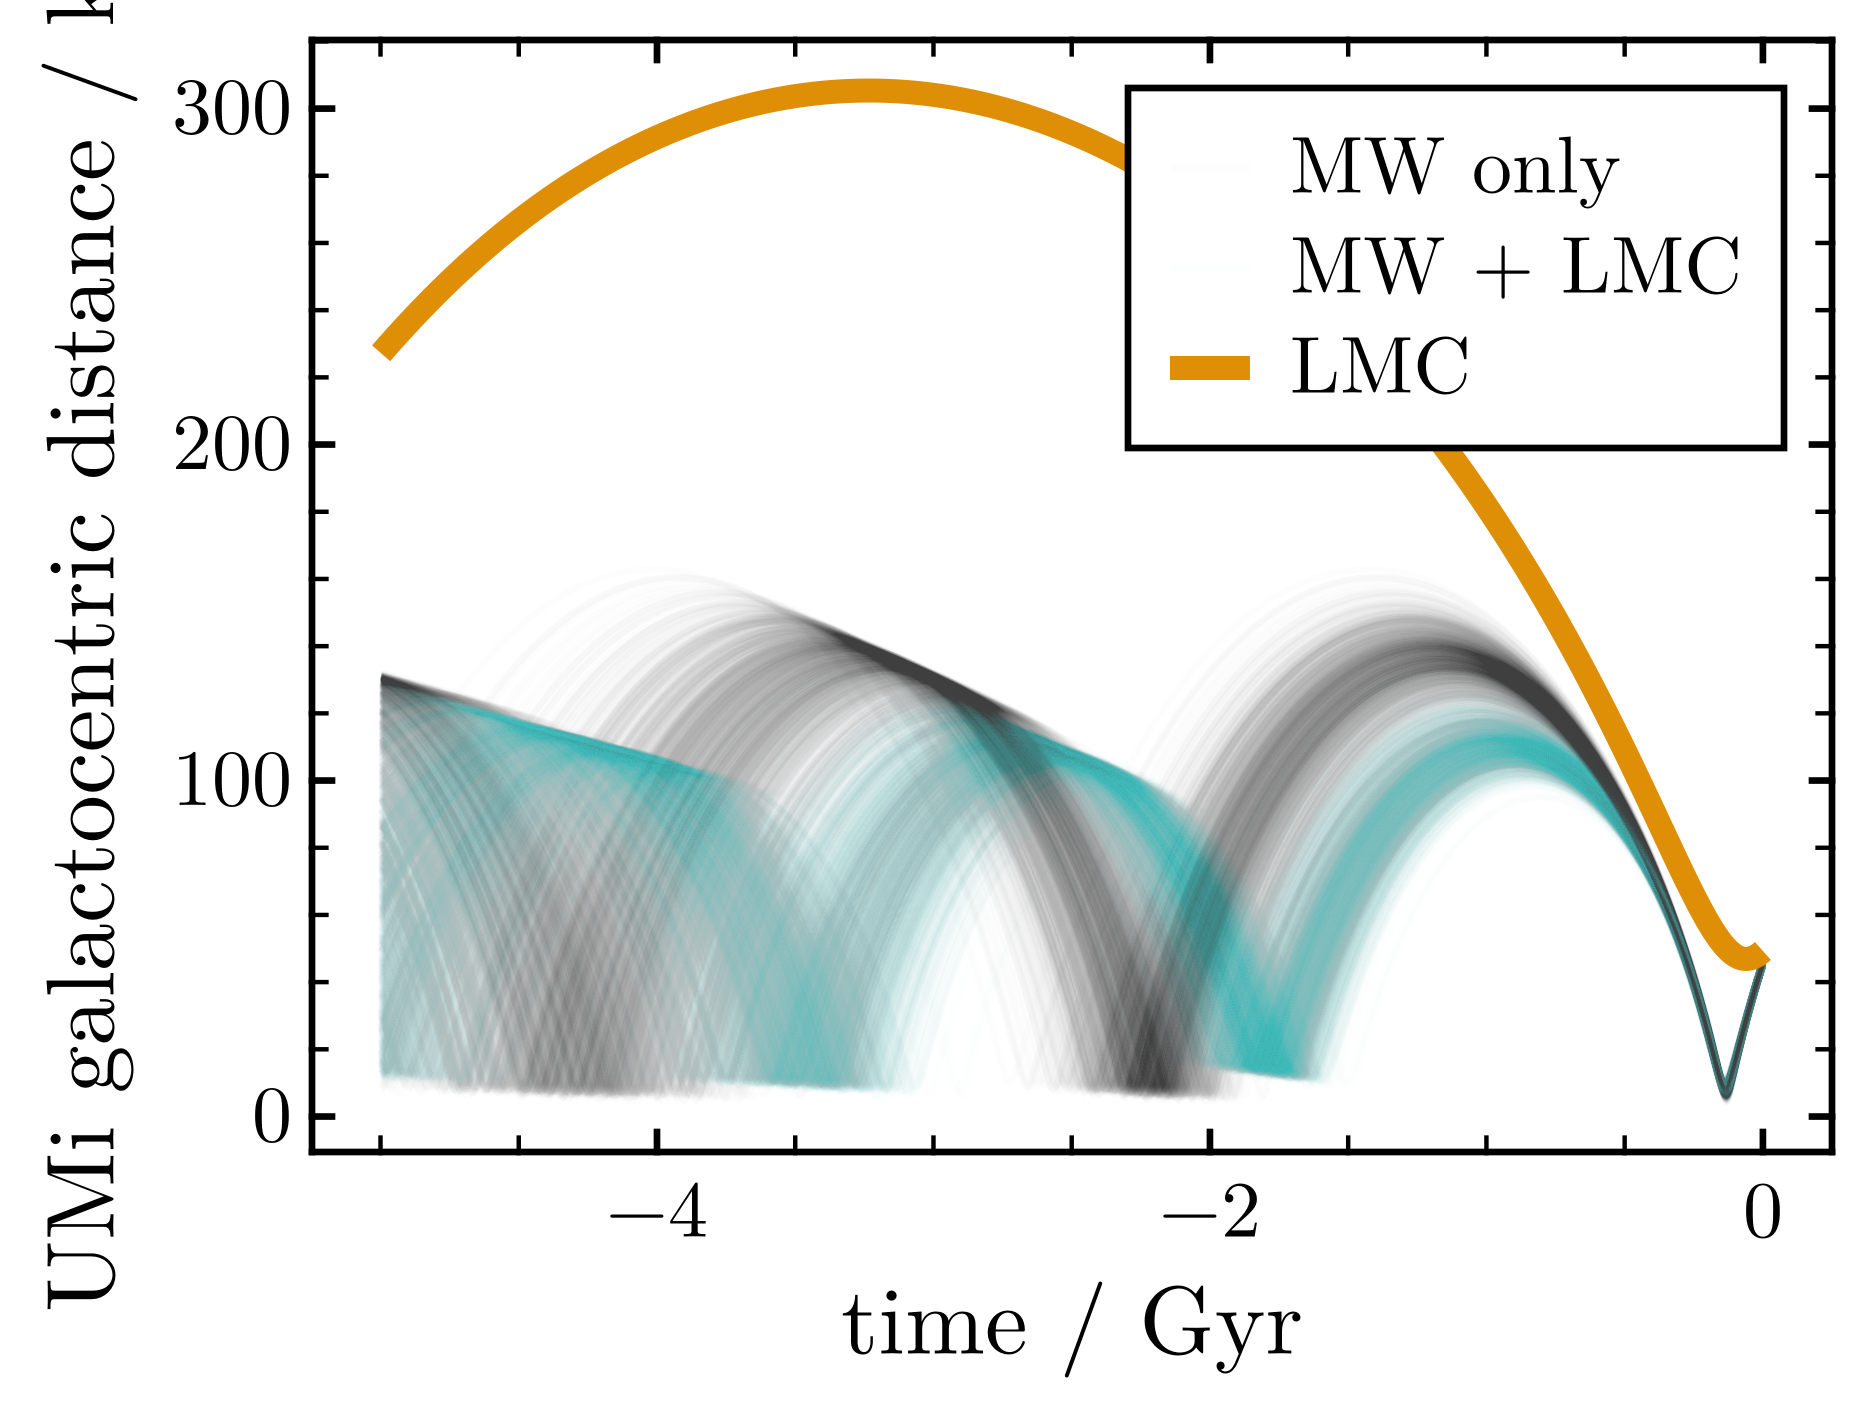

In [70]:
fig = Figure()
ax = Axis(fig[1, 1], xlabel="time / Gyr", ylabel = "UMi galactocentric distance / kpc",
    xgridvisible=false, ygridvisible=false
)

plot_r_t_traj!(traj_no_lmc, label="MW only")
plot_r_t_traj!(traj_w_lmc, label="MW + LMC", color=COLORS[1])
plot_r_t_traj!(traj_lmc, label="LMC", alpha=1, color=COLORS[2], linewidth=3)

axislegend(unique=true)
@savefig "r_t_w_wo_lmc"
fig

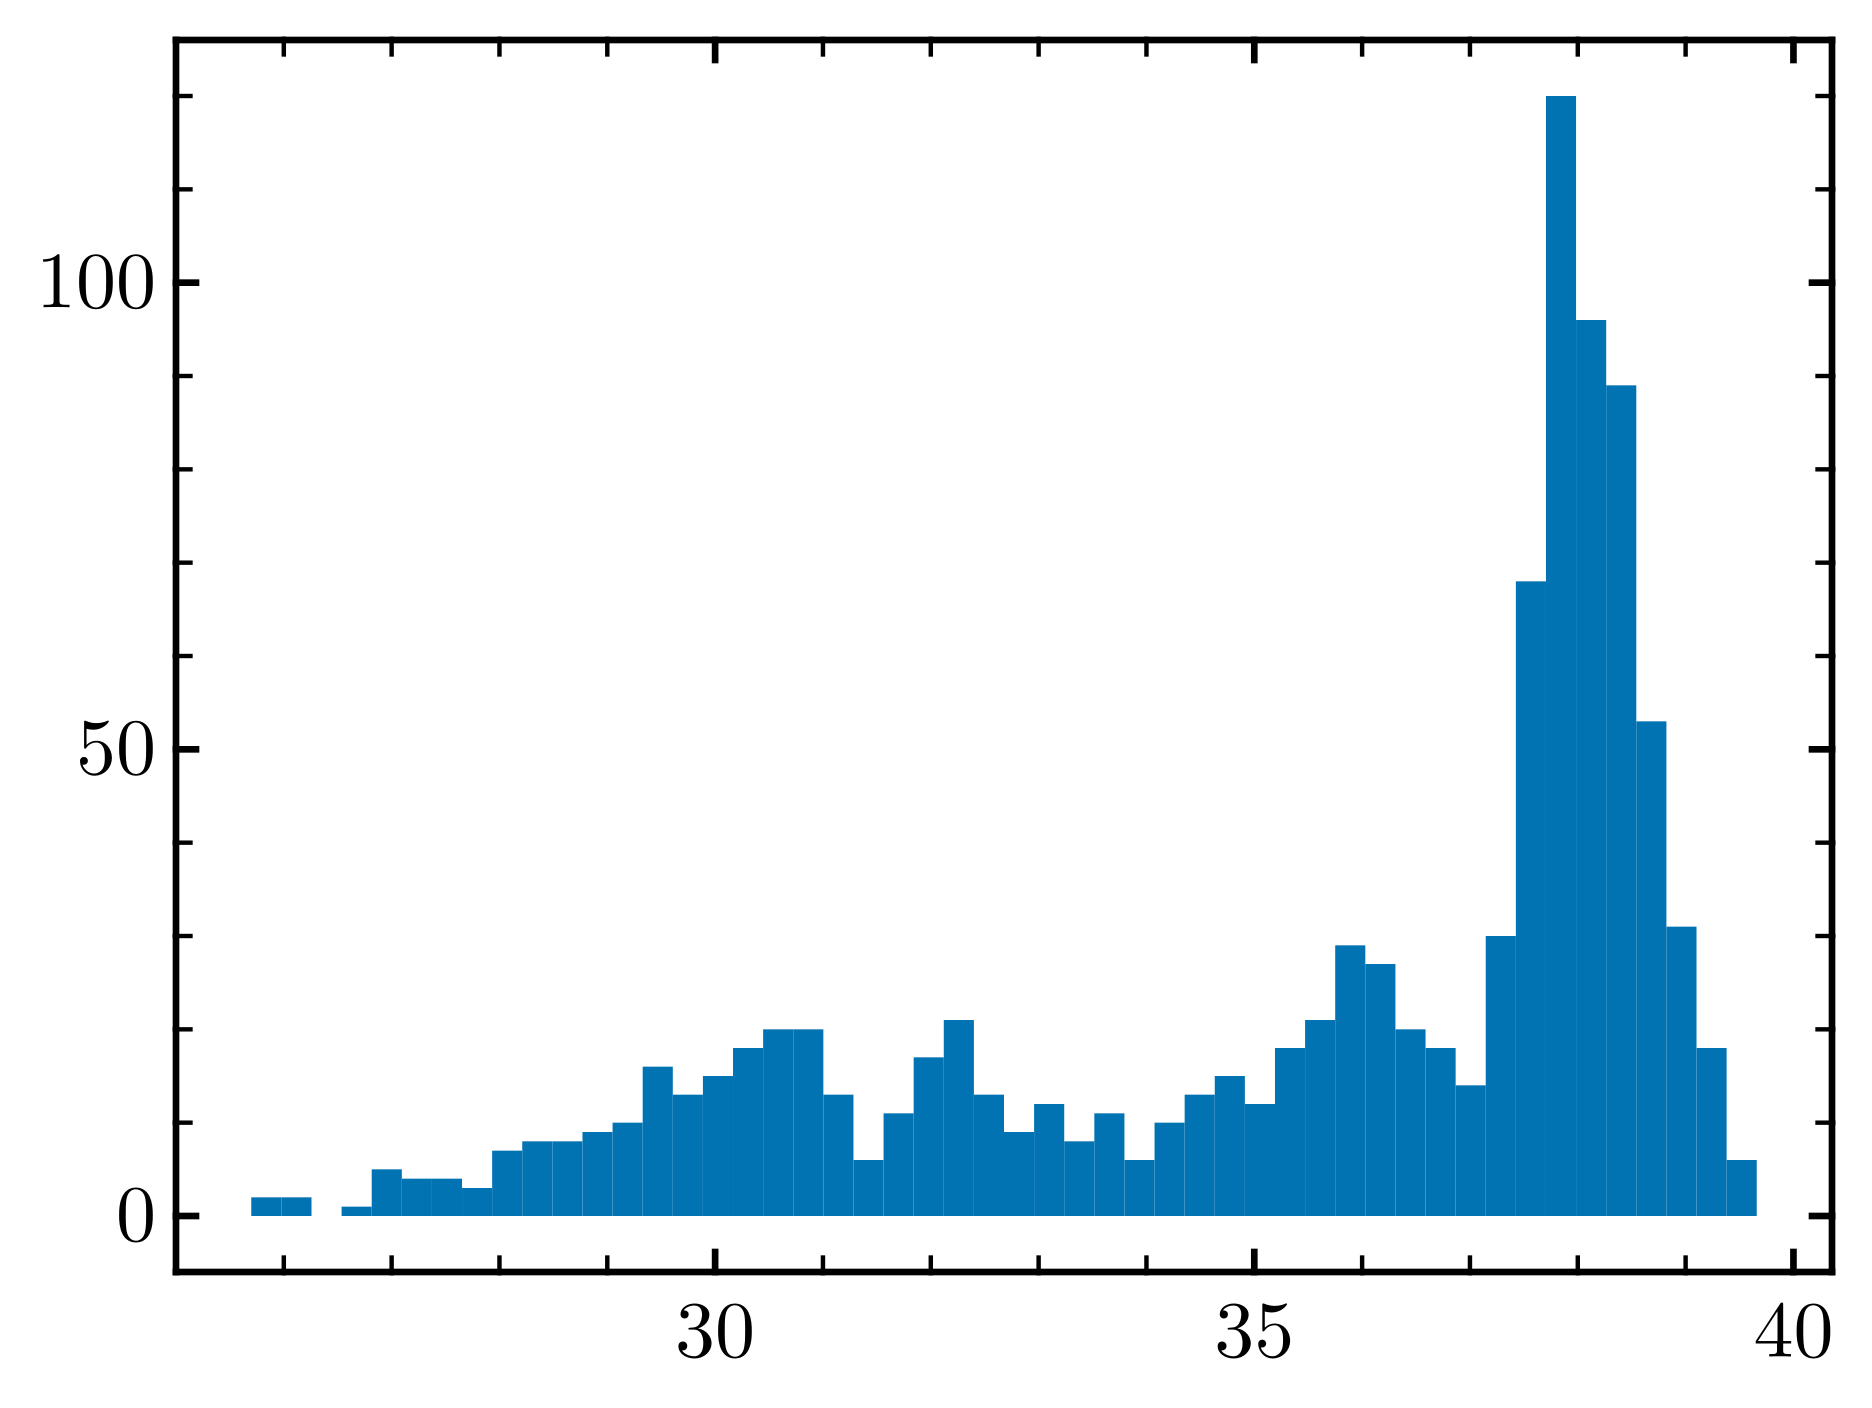

In [71]:
hist(r_lmc_peri, bins=50)

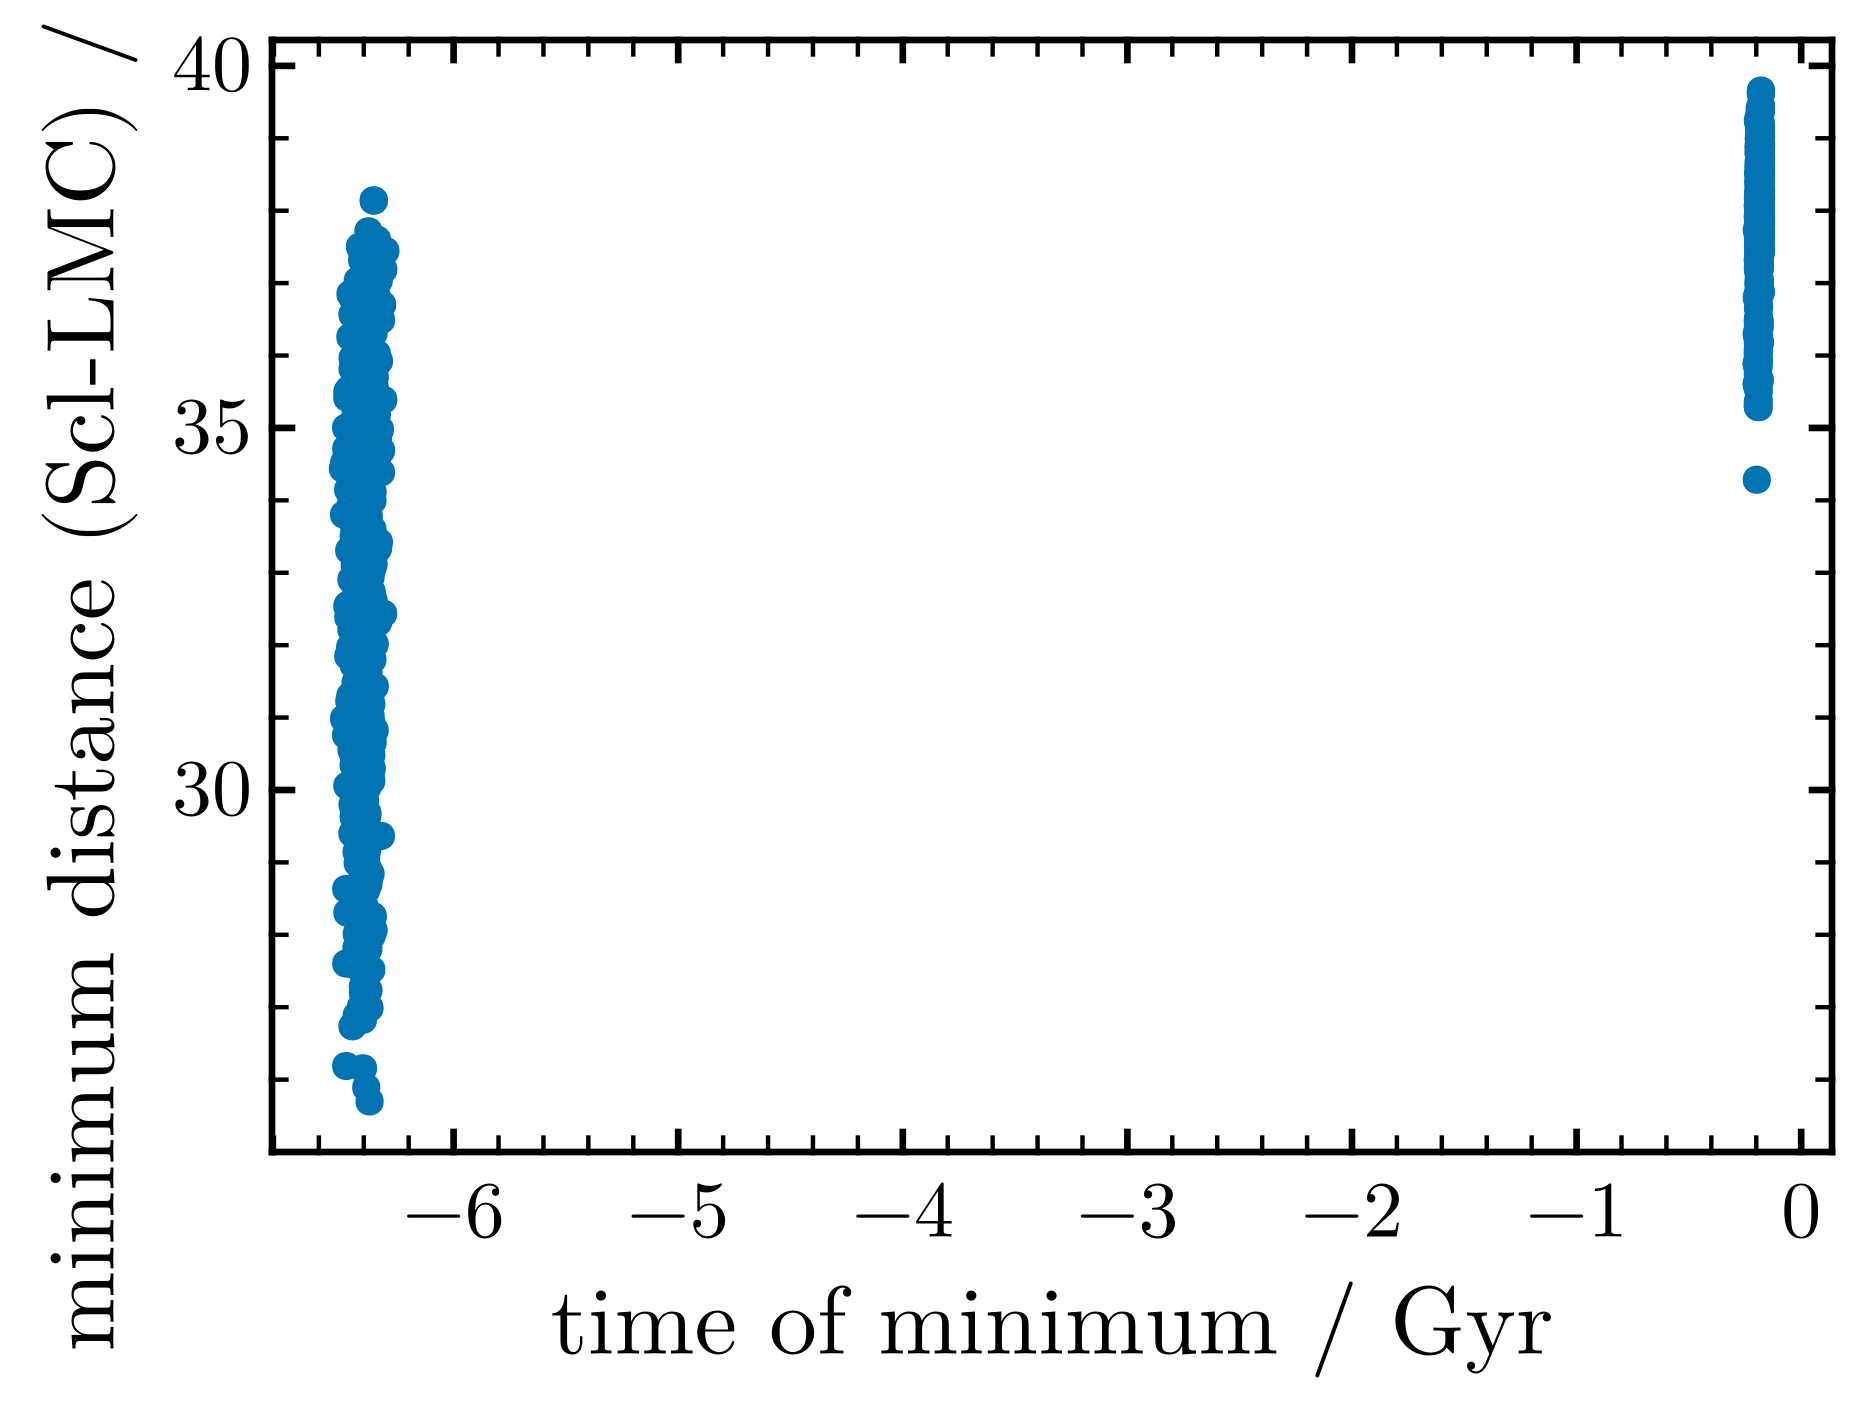

In [80]:
fig = Figure()
ax = Axis(fig[1, 1], xlabel="time of minimum / Gyr", ylabel="minimum distance (Scl-LMC) / kpc")

scatter!(t_lmc_peri * T2GYR .+ 0.0003 * randn(length(t_lmc_peri)), r_lmc_peri)

fig

The above plot shows that UMi does not become close at all to the LMC. The time of minimum distance is now.

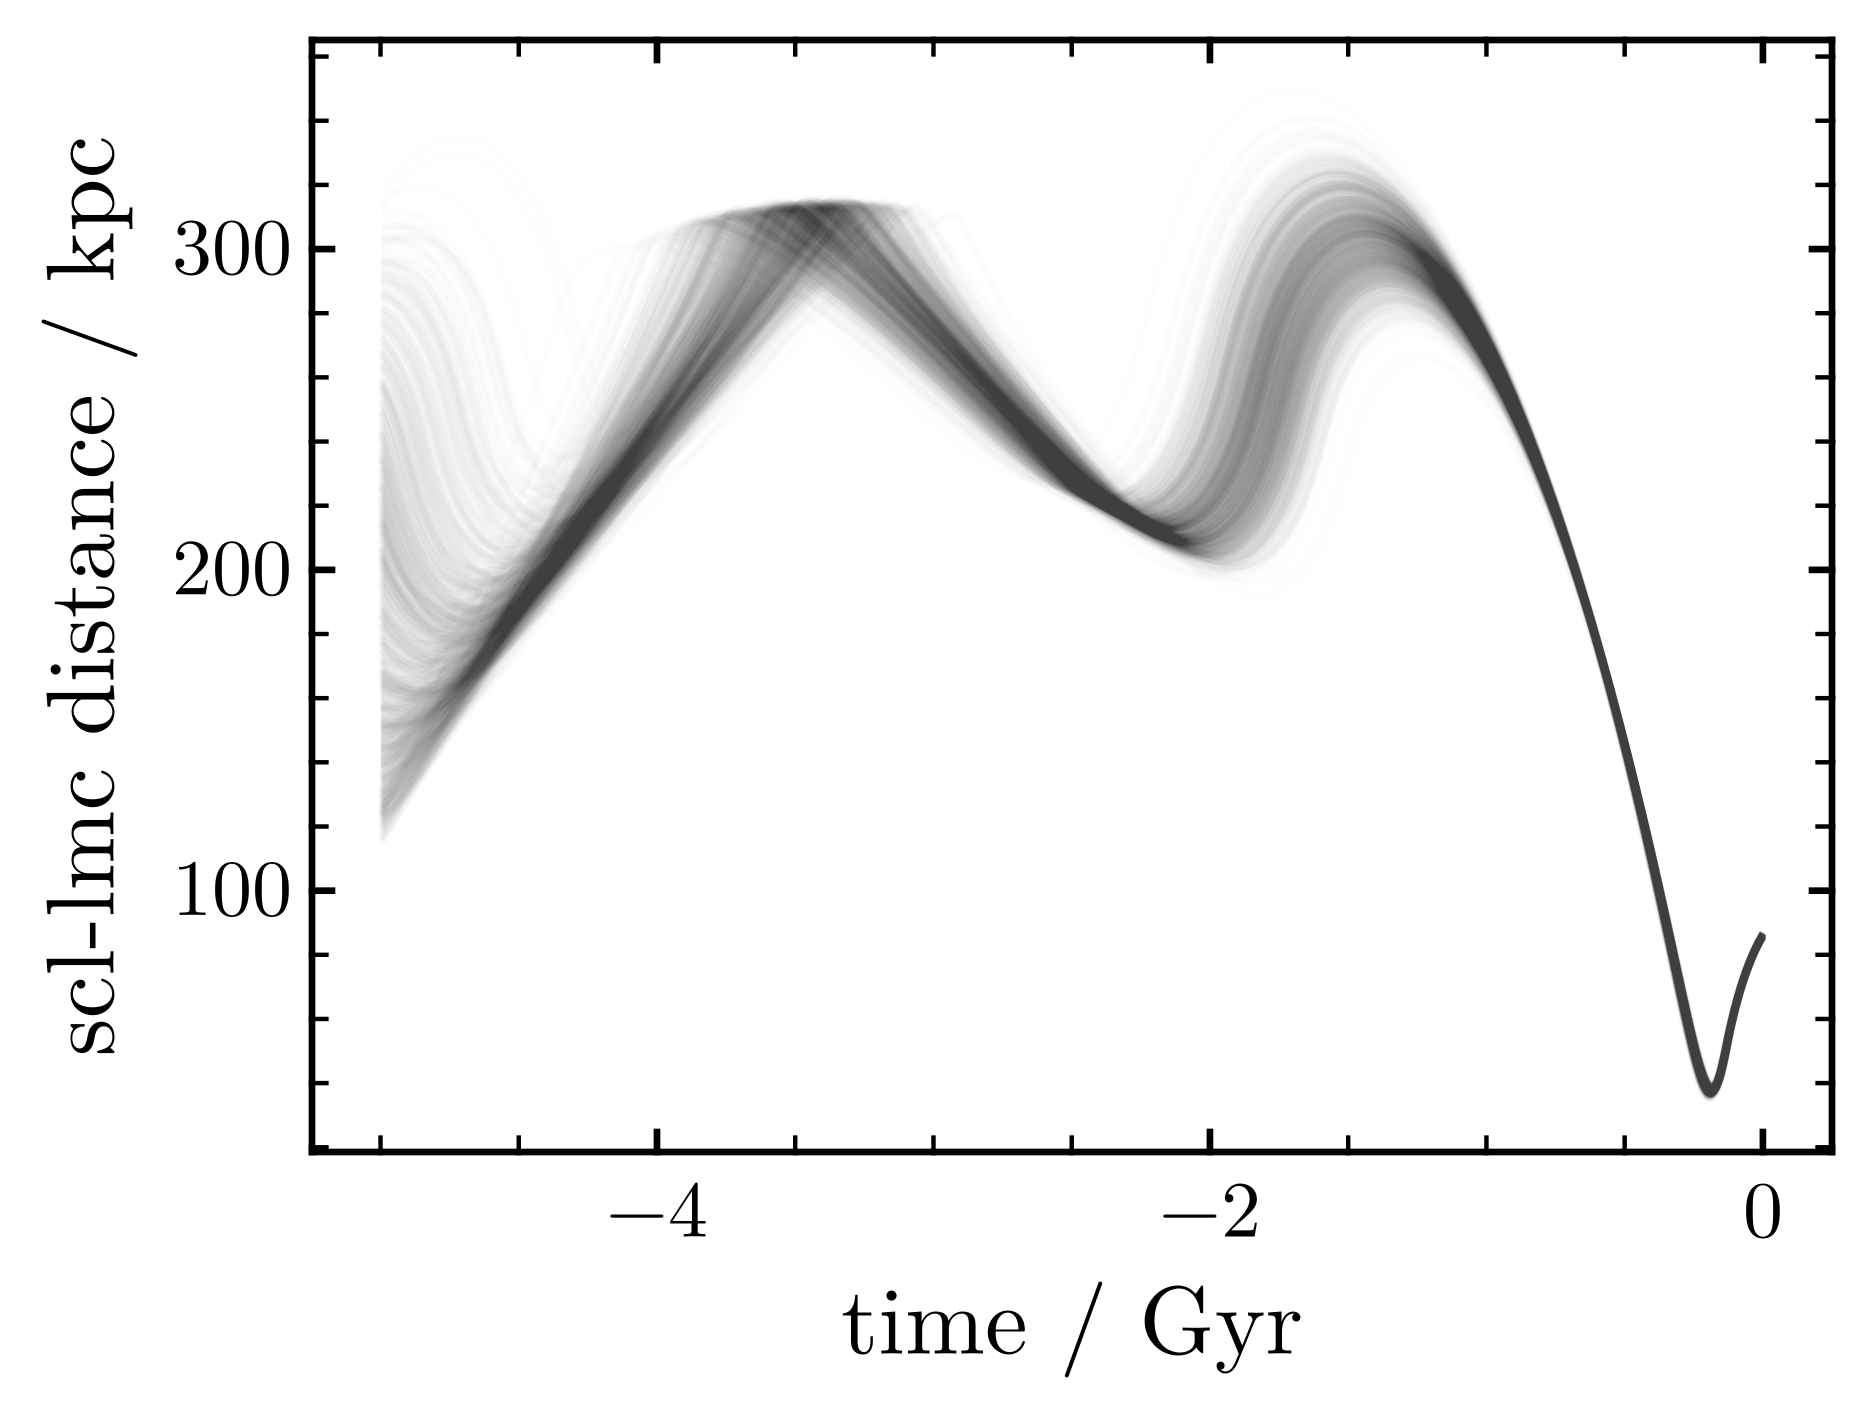

In [79]:
fig = Figure()
ax = Axis(fig[1, 1], xlabel="time / Gyr", ylabel = "scl-lmc distance / kpc",
    xgridvisible=false, ygridvisible=false
)

plot_r_t_traj!(traj_m_lmc)

fig

## 

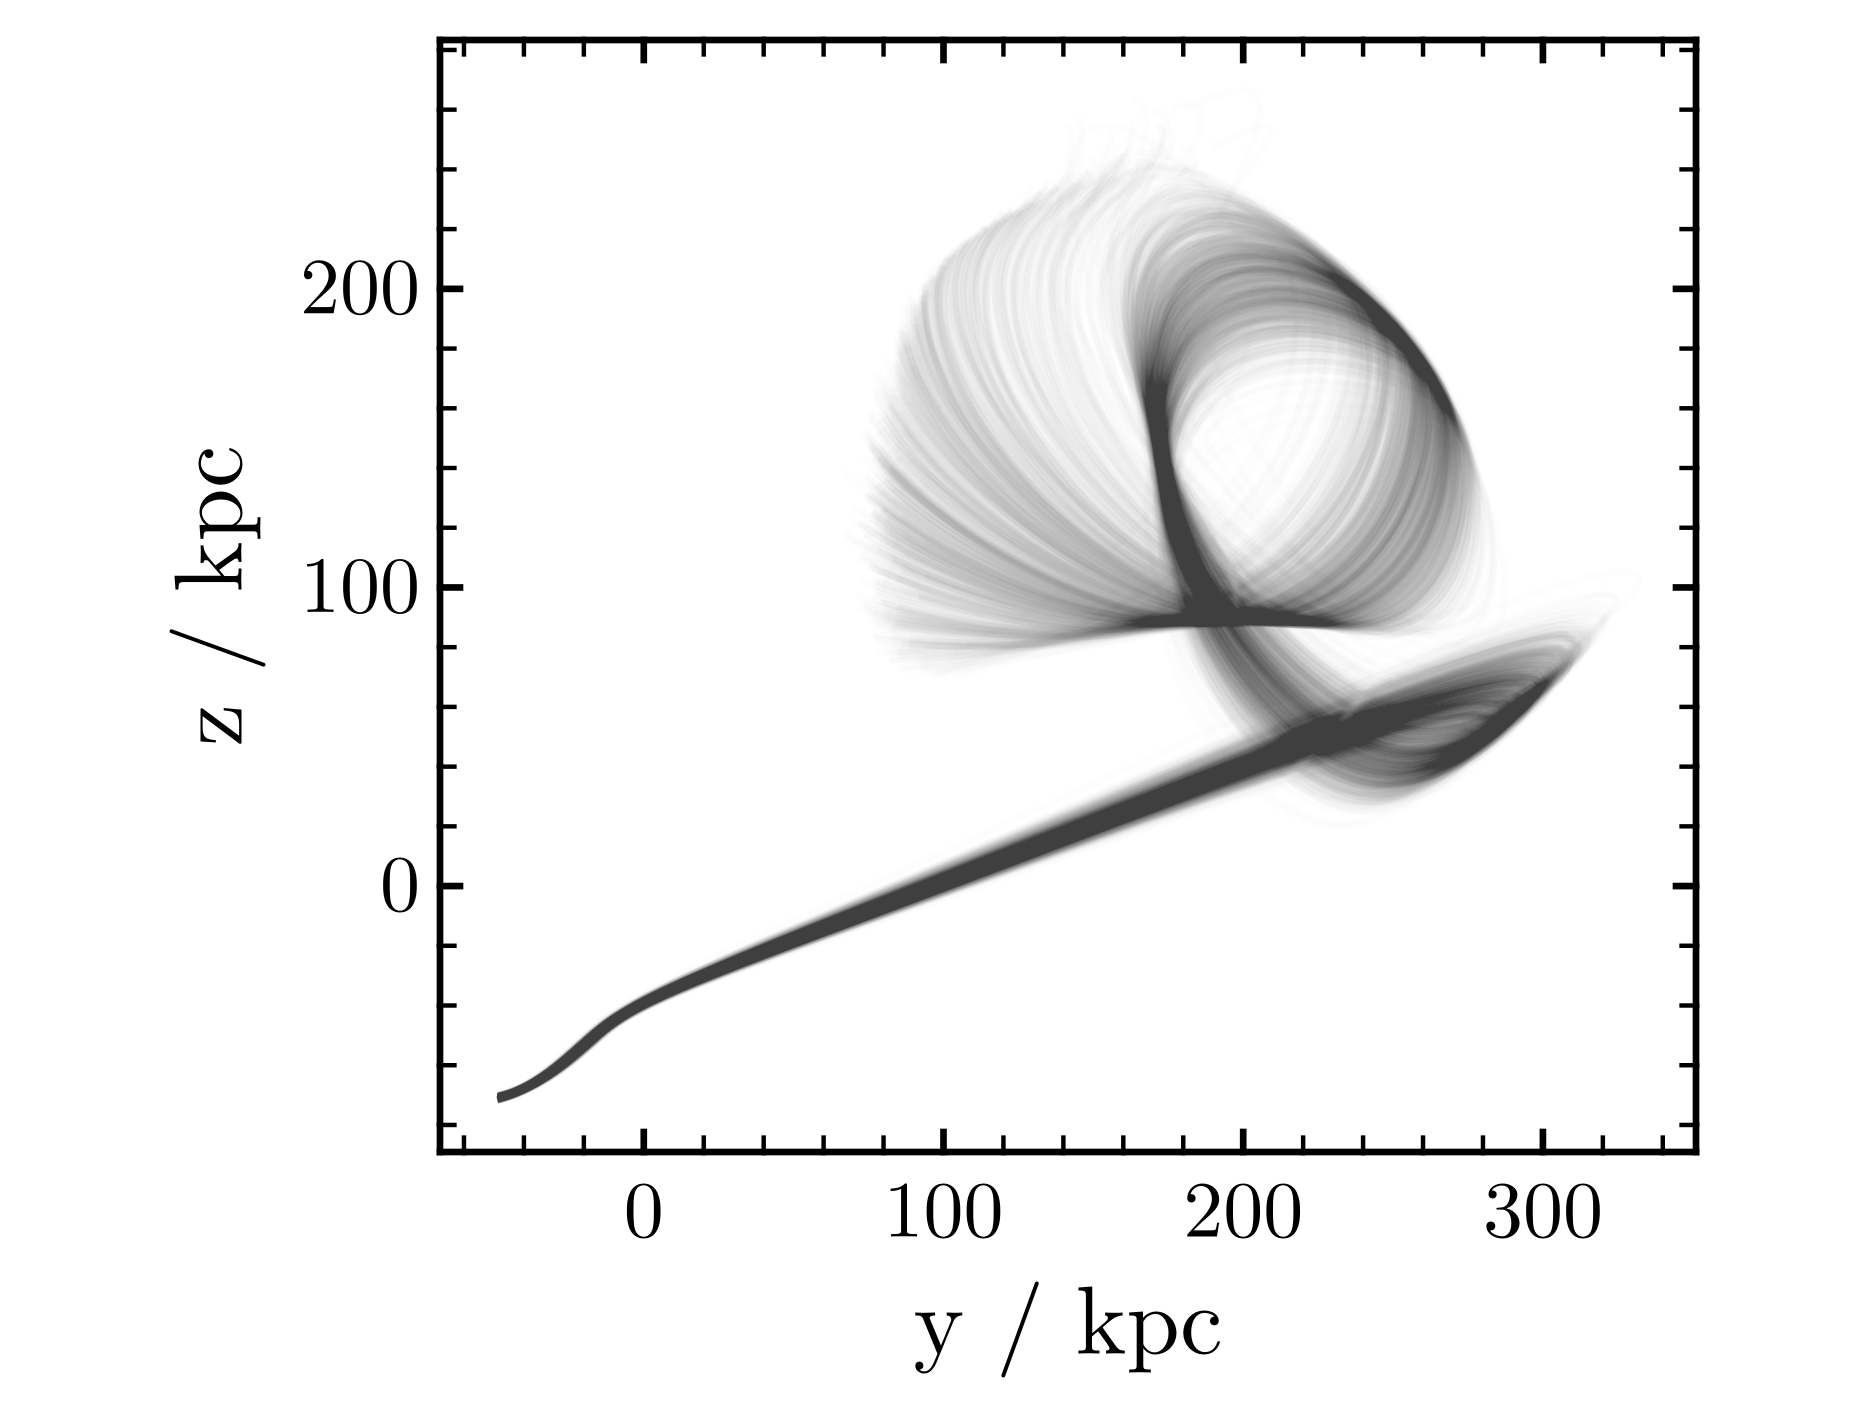

In [78]:
fig = Figure()
ax = Axis(fig[1, 1], xlabel="y / kpc", ylabel="z / kpc",
    xgridvisible=false, ygridvisible=false, 
    aspect=DataAspect(),
)
plot_x_y_traj!(traj_m_lmc)

fig

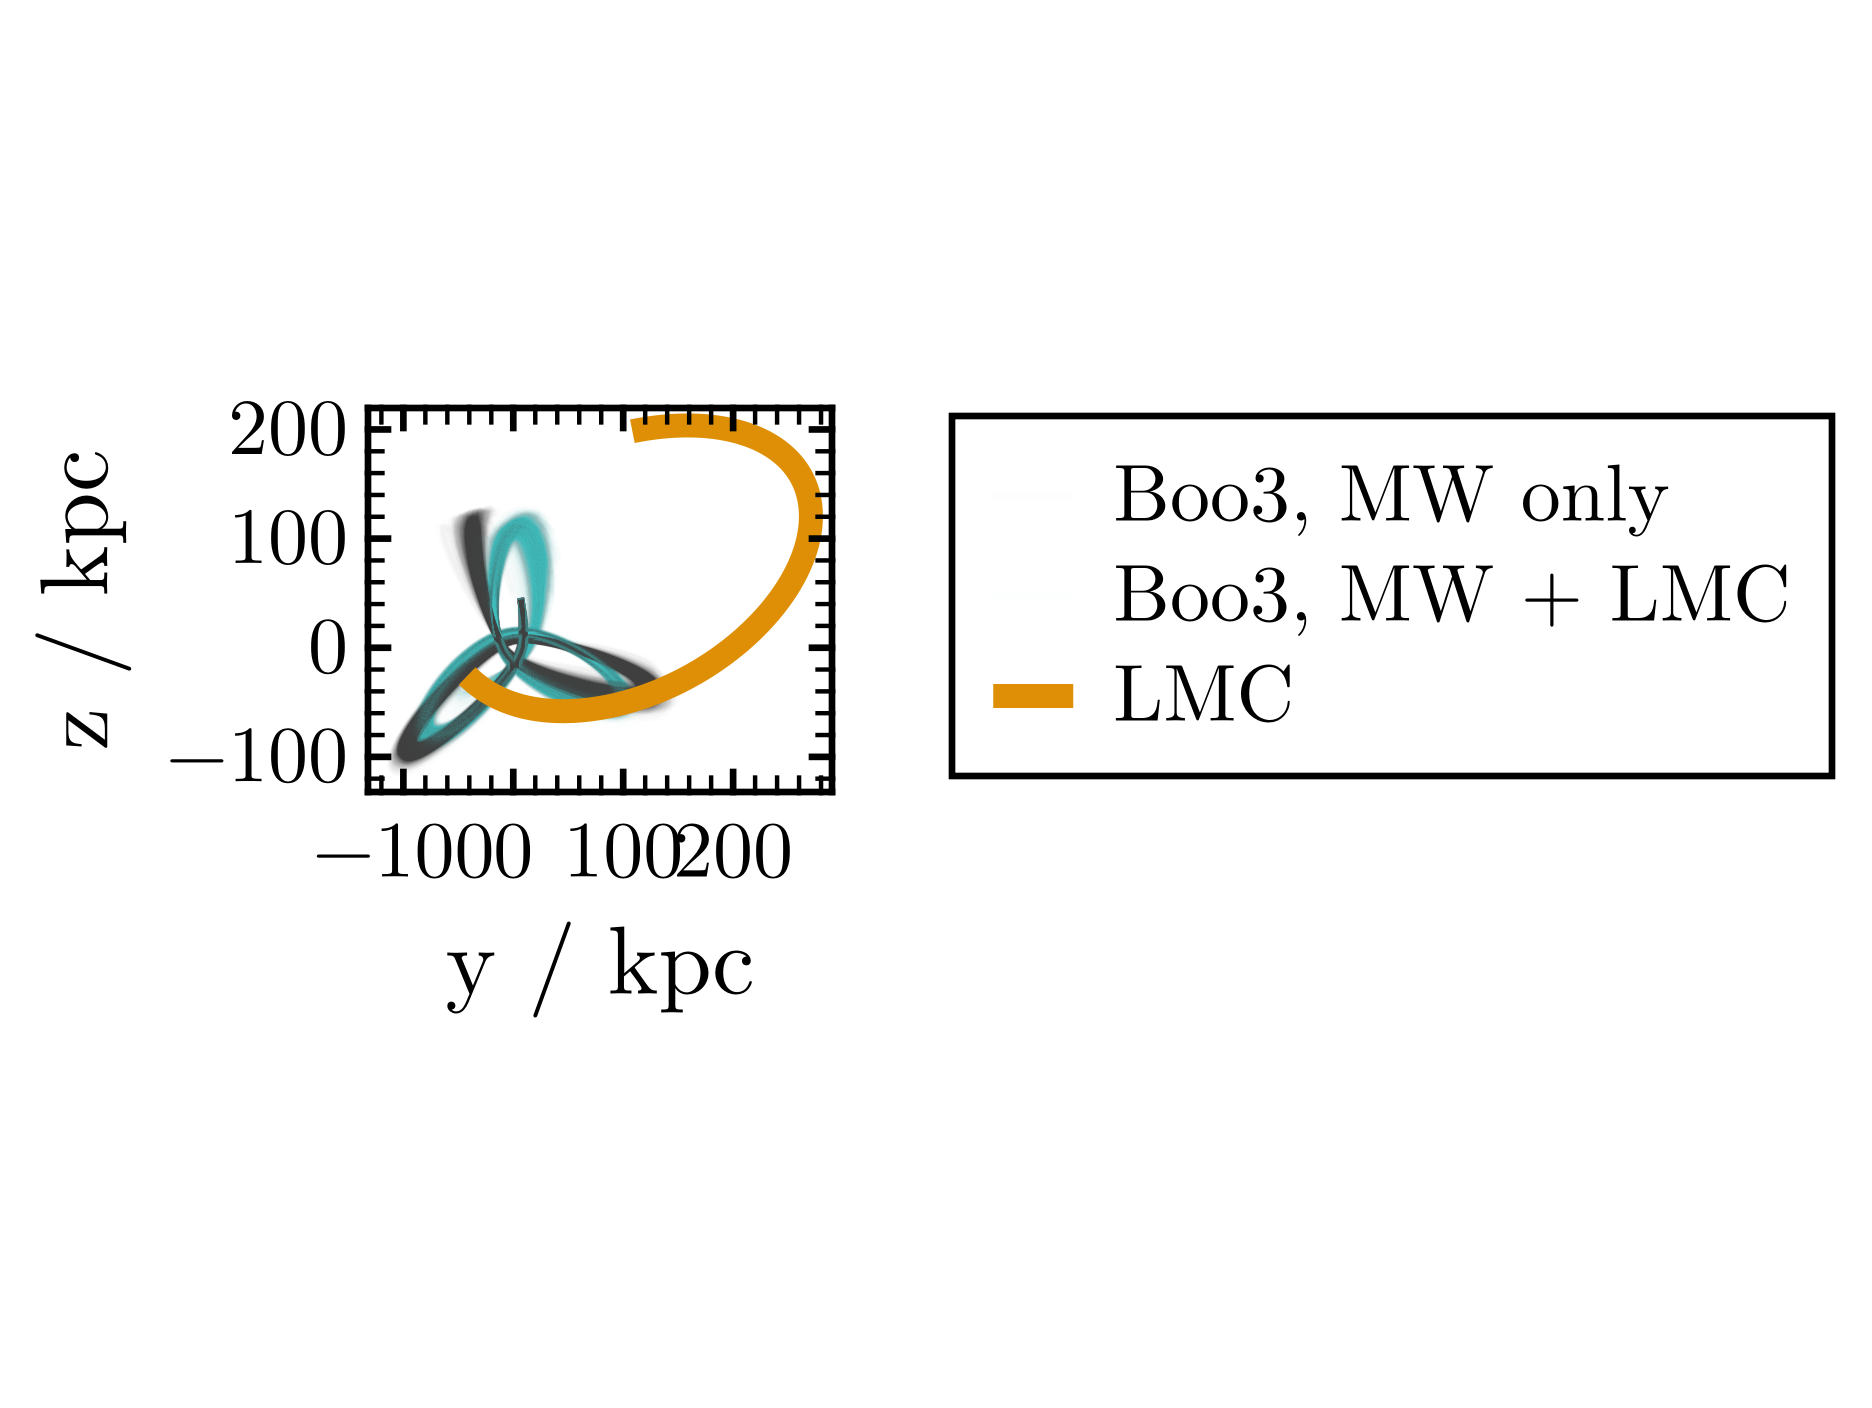

In [77]:
fig = Figure()
ax = Axis(fig[1, 1], xlabel="y / kpc", ylabel="z / kpc",
    xgridvisible=false, ygridvisible=false, 
    aspect=DataAspect(),
)
plot_x_y_traj!(traj_no_lmc, label="Boo3, MW only")
plot_x_y_traj!(traj_w_lmc, label="Boo3, MW + LMC", color=COLORS[1])
plot_x_y_traj!(traj_lmc, label="LMC", alpha=1, color=COLORS[2], linewidth=2)

Legend(fig[1,2], ax, unique=true)

fig